In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Olympic History Data Analysis

This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016.

- There are two CSV files namely athlete_events.csv and noc_regions.csv.
- We can focus more on athlete_events.csv file instead of noc_regions.csv file since 209 out of 230 values are missing in the `notes` column of noc_regions.csv file and the other two columns, `NOC` and `region` already exists in the athlete_events.csv file under the names of `NOC` and `Team` respectively

The dataset athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:

- ID - Unique number for each athlete
- Name - Athlete's name
- Sex - M or F
- Age - Integer
- Height - In centimeters
- Weight - In kilograms
- Team - Team name
- NOC - National Olympic Committee 3-letter code
- Games - Year and season
- Year - Integer
- Season - Summer or Winter
- City - Host city
- Sport - Sport
- Event - Event
- Medal - Gold, Silver, Bronze, or NA

### Data Preprocessing
- merged both the datasets `noc_region` and `athlete_events` into a single dataframe `df`
- Dropped the column `notes` (It had a lot of missing values and also it didn't provide any important info)
- There are 16 columns after merging and dropping the notes column


#### Data Cleaning
- the column `Medal` has a lot of missing values (Obviously not everyone that participates in the olympics doesn't win a medal)
- Filled the missing values in the `Medal` column with the value `DNW` for "did not win"
- Changed the name of the column `region` to `country`
- There are 370 missing values in the `country` column, we can rectify this by providing the values in `Team` column for these missing values
- Found something interesting while checking the names of the coutries - 'Singapore' 'Singapore-1' 'Singapore-2', rectified it

- There are some missing values in the age, height and weight columns, But we can not fill these values with mean, median and mode values or use ffill or bfill or fillna method with a single value.
- So to solve this issue, we are gonna fill the missing values based on groups in the DataFrame
(Assumption is that the age, height and weight of people participating in the same sport is similar)
- All missing values have been filled
- There were 1385 duplicate values, I kept the first and dropped the rest
- After Data preprocessing and data cleaning there are 269731 rows and 16 columns



### Informative Notes
- The Summer and Winter Olympics used to occur in four-year intervals. This tradition dates back to Ancient Greece when the first Olympics were held in 776 BC.
- But the Summer and Winter Olympics are npw staggered so that there's an Olympic event every two years: the Summer Olympics are held every leap year, and the Winter Olympics are held two years after the leap year.
- The schedule was changed in 1986 when the International Olympic Committee (IOC) voted to allow one competition to be held every two years. According to Jason Stallman, an Olympic editor at *The New York Times*, this decision gave the Winter Olympics more prominence, improved media coverage for both games, and significantly increased revenue for the IOC, largely through television rights.
-

### Loading the Datasets and performing Preliminary Analysis

In [ ]:
regions = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI ML Class/datasets_for_analysis/Olympic History Data Analysis/noc_regions.csv")
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [ ]:
regions.shape

(230, 3)

In [ ]:
regions.dtypes

,0
NOC,object
region,object
notes,object


In [ ]:
regions.isna().sum()

,0
NOC,0
region,3
notes,209


In [ ]:
athlete_events = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI ML Class/datasets_for_analysis/Olympic History Data Analysis/athlete_events.csv")

In [ ]:
athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
athlete_events.dtypes

,0
ID,int64
Name,object
Sex,object
Age,float64
Height,float64
Weight,float64
Team,object
NOC,object
Games,object
Year,int64


### Data Preprocessing
- merged both the datasets `noc_region` and `athlete_events` into a single dataframe `df`
- Dropped the column `notes` (It had a lot of missing values and also it didn't provide any important info)
- There are 16 columns after merging the two datasets and dropping the `notes` column

In [ ]:
df = pd.merge(athlete_events, regions, on='NOC', how='left')

In [ ]:
df.shape

(271116, 17)

In [ ]:
df.drop(columns=['notes'], inplace=True)

In [ ]:
df.shape

(271116, 16)

#### Data Cleaning
- the column `Medal` has a lot of missing values (Obviously not everyone that participates in the olympics doesn't win a medal)
- Filled the missing values in the `Medal` column with the value `DNW` for "did not win"
- Changed the name of the column `region` to `country`
- There are 370 missing values in the `country` column, we can rectify this by providing the values in `Team` column for these missing values
- Found something interesting while checking the names of the coutries - 'Singapore' 'Singapore-1' 'Singapore-2', rectified it

- There are some missing values in the age, height and weight columns, But we can not fill these values with mean, median and mode values or use ffill or bfill or fillna method with a single value.
- So to solve this issue, we are gonna fill the missing values based on groups in the DataFrame
(Assumption is that the age, height and weight of people participating in the same sport is similar)
- After perfroming the above step, there were 99 values missing in the Height column and 217 values missing in the weight.
- After going through the current missing value rows, it is clear that the missing values are for sports that were not popular in the history of olympics auch as 'Polo', 'Cricket', 'Racquets', 'Military Ski Patrol', 'Croquet', 'Jeu De Paume', 'Roque', 'Alpinism', 'Basque Pelota', 'Aeronautics'. Infact, some of these sports such as Aeronautics were only a demonstration and not a sport at all.
- So it stands to reason that these rows can be deleted withour it having much effect on our Analysis  
- All missing values have been handled
- There were 1385 duplicate values, I kept the first and dropped the rest
- After Data cleaning there are 269514 rows and 16 columns

In [ ]:
df.isna().sum()

,0
ID,0
Name,0
Sex,0
Age,9474
Height,60171
Weight,62875
Team,0
NOC,0
Games,0
Year,0


In [ ]:
df['Medal'] = df['Medal'].fillna("DNW")
# filling the missing values in Medal column with DNW for 'did not win'

In [ ]:
df.rename(columns={'region':'Country'}, inplace=True)
# rename the name of column region to country

In [ ]:
df[['Team', 'Country']][df['Country'].isnull()]
# checking the corresponding values of the Team column of the missing values in the Country column

,Team,Country
578,Singapore,NaN
579,Singapore,NaN
2719,Singapore,NaN
6267,Refugee Olympic Athletes,NaN
7659,Singapore,NaN
...,...,...
268752,Singapore,NaN
268753,Singapore,NaN
268993,Singapore,NaN
268994,Singapore-1,NaN


In [ ]:
df['Country'] = df['Country'].fillna(df['Team'])

In [ ]:
countries = df['Country'].unique()
countries.sort()
print(countries)

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Boliva'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba'
 'Curacao' 'Cyprus' 'Czech Republic' 'Democratic Republic of the Congo'
 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji'
 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Grenada' 'Guam' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Individual Olympic Athletes'
 'Indonesia' 'Iran' 'Iraq' 'Ireland' '

In [ ]:
df.loc[(df['Country'] == 'Singapore') | (df['Country'] == 'Singapore-1') |
       (df['Country'] == 'Singapore-2'), 'Country'] = 'Singapore'

In [ ]:
df.isna().sum()

,0
ID,0
Name,0
Sex,0
Age,9474
Height,60171
Weight,62875
Team,0
NOC,0
Games,0
Year,0


In [ ]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ID       271116 non-null  int64  
 1   Name     271116 non-null  object 
 2   Sex      271116 non-null  object 
 3   Age      261642 non-null  float64
 4   Height   210945 non-null  float64
 5   Weight   208241 non-null  float64
 6   Team     271116 non-null  object 
 7   NOC      271116 non-null  object 
 8   Games    271116 non-null  object 
 9   Year     271116 non-null  int64  
 10  Season   271116 non-null  object 
 11  City     271116 non-null  object 
 12  Sport    271116 non-null  object 
 13  Event    271116 non-null  object 
 14  Medal    271116 non-null  object 
 15  Country  271116 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 33.1+ MB


In [ ]:
game_years = df.Year.unique()
game_years.sort()
game_years, len(game_years)

(array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
        1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
        1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
        2014, 2016]),
 35)

In [ ]:
df['Age'] = df.groupby('Sport')['Age'].transform(lambda x: x.fillna(round(x.median()))).astype(int)
df['Age'] = pd.to_numeric(df['Age'])

In [ ]:
df['Height'] = df.groupby('Sport')['Height'].transform(lambda x: x.fillna(x.median()))
df['Height'] = pd.to_numeric(df['Height'])

In [ ]:
df['Weight'] = df.groupby('Sport')['Weight'].transform(lambda x: x.fillna(x.median()))
df['Weight'] = pd.to_numeric(df['Weight'])

In [ ]:
df.isna().sum()

,0
ID,0
Name,0
Sex,0
Age,0
Height,99
Weight,217
Team,0
NOC,0
Games,0
Year,0


In [ ]:
df[(df['Height'].isna()) | df['Weight'].isna()].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
5043,2871,"Terence de la Mesa ""Terry"" Allen",M,32,177.5,NaN,United States,USA,1920 Summer,1920,Summer,Antwerpen,Polo,Polo Men's Polo,Bronze,USA
6315,3543,Heinrich Amsinck,M,44,177.5,NaN,Germany,GER,1936 Summer,1936,Summer,Berlin,Polo,Polo Men's Polo,DNW,Germany
6892,3871,William Wallace Anderson,M,40,NaN,NaN,Union des Socits Franais de Sports Athletiques,GBR,1900 Summer,1900,Summer,Paris,Cricket,Cricket Men's Cricket,Silver,UK
7207,4029,Manuel ngel Andrada,M,46,177.5,NaN,Argentina,ARG,1936 Summer,1936,Summer,Berlin,Polo,Polo Men's Polo,Gold,Argentina
10460,5716,John Jacob Astor,M,21,176.0,NaN,Great Britain,GBR,1908 Summer,1908,Summer,London,Racquets,Racquets Men's Singles,Bronze,UK


In [ ]:
df['Sport'][(df['Height'].isna()) | df['Weight'].isna()].unique()

array(['Polo', 'Cricket', 'Racquets', 'Military Ski Patrol', 'Croquet',
       'Jeu De Paume', 'Roque', 'Alpinism', 'Basque Pelota',
       'Aeronautics'], dtype=object)

In [ ]:
df['Sport'][(df['Height'].isna()) | df['Weight'].isna()].value_counts()

,count
Sport,
Polo,95
Alpinism,25
Cricket,24
Military Ski Patrol,24
Croquet,19
Racquets,12
Jeu De Paume,11
Roque,4
Basque Pelota,2


In [ ]:
indexes = df[(df['Height'].isna()) | df['Weight'].isna()].index
df.drop(indexes, inplace=True)
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
0,1,A Dijiang,M,24,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China
1,2,A Lamusi,M,23,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China
2,3,Gunnar Nielsen Aaby,M,24,175.0,71.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark
3,4,Edgar Lindenau Aabye,M,34,182.0,95.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,DNW,Poland
271112,135570,Piotr ya,M,27,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",DNW,Poland
271113,135570,Piotr ya,M,27,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",DNW,Poland
271114,135571,Tomasz Ireneusz ya,M,30,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,DNW,Poland


In [ ]:
df.isna().sum()

,0
ID,0
Name,0
Sex,0
Age,0
Height,0
Weight,0
Team,0
NOC,0
Games,0
Year,0


In [ ]:
df.duplicated().sum()

1385

In [ ]:
df[df.duplicated()].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
1252,704,Dsir Antoine Acket,M,27,175.0,76.0,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",DNW,Belgium
4282,2449,William Truman Aldrich,M,48,175.0,76.0,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",DNW,USA
4283,2449,William Truman Aldrich,M,48,175.0,76.0,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",DNW,USA
4862,2777,Hermann Reinhard Alker,M,43,175.0,76.0,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",DNW,Germany
4864,2777,Hermann Reinhard Alker,M,43,175.0,76.0,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",DNW,Germany


In [ ]:
df.drop_duplicates(keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)
df.duplicated().sum()

0

In [ ]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
0,1,A Dijiang,M,24,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China
1,2,A Lamusi,M,23,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China
2,3,Gunnar Nielsen Aaby,M,24,175.0,71.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark
3,4,Edgar Lindenau Aabye,M,34,182.0,95.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269509,135569,Andrzej ya,M,29,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,DNW,Poland
269510,135570,Piotr ya,M,27,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",DNW,Poland
269511,135570,Piotr ya,M,27,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",DNW,Poland
269512,135571,Tomasz Ireneusz ya,M,30,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,DNW,Poland


#### Feature Engineering - Let's add some features

- Added `BMI` or Body Mass Index feature it can help us understand the fitness of athletes participating in different sports, also the average fitness over the years
- Added `BMI_category` With four categories - Underweight, Normal Weight, OverWeight, Obese
- Added `age_category` with four categories of increasing age from less then 20 to over 35 years old - "Budding Competitor", "Rising Competitor", "Seasoned Competitor" and "Senior Competitor"
- Added `Event_era` with three eras namely "Foundational Era" for year<=1950, "Growth Era" for 1951-2000 and "Modern Era" for years>=2001
- Added `Sports_category` with two categories namely Individual_sports and Team_sports. Did some research on which categories the sports belong to.

- Curently after Feature Engineering there 269514 rows and 21 columns.

In [ ]:
# Body Mass Index can be used to check the fitness of the athletes in different sports
df['BMI'] = (df['Weight']/((df['Height']*df['Height'])/10000)).round(2)

**BMI Ranges and Interpretation**
Body Mass Index (BMI) is commonly used to assess an individual's body weight relative to their height and is categorized into the following ranges:

| **BMI Range** (kg/m²) | **Category**          | **Explanation**                                |
|------------------------|-----------------------|-----------------------------------------------|
| Below 18.5            | Underweight          | May indicate insufficient body weight.        |
| 18.5–24.9             | Normal Weight        | Ideal range for general health.               |
| 25.0–29.9             | Overweight           | Indicates higher body weight for height.      |
| 30.0 and above        | Obese                | Associated with increased health risks.       |

---
**Optimal BMI for Athletes**
The "best" BMI range for an athlete varies significantly depending on the sport they participate in, as different sports require different physical builds. However, for most athletes:

1. **General Recommendation**:  
   - A BMI in the range of **18.5–24.9** is considered optimal for fitness and health.
   - For certain endurance sports (e.g., long-distance running, cycling), athletes may have BMIs slightly lower than this range, as leanness improves performance.

2. **Sport-Specific Recommendations**:
   - **Endurance Sports (e.g., Running, Swimming)**: Lower BMI (18.5–22.0) for efficiency.
   - **Strength and Power Sports (e.g., Weightlifting, Wrestling)**: Higher BMI (24.0–29.9) due to muscle mass.
   - **Aesthetic Sports (e.g., Gymnastics, Figure Skating)**: BMI often between **19.0–23.0**.
   - **Team Sports (e.g., Football, Basketball)**: BMI varies depending on position, but typically **20.0–27.0**.

---

**Considerations for Athletes**
- **BMI Limitations**:
  - BMI does not differentiate between muscle and fat mass. For example, a bodybuilder may have a high BMI due to muscle, not fat.
  - For athletes, a low or high BMI might not indicate poor fitness if it aligns with the demands of their sport.
  
- **Fitness Beyond BMI**:
  - Metrics like body fat percentage, VO₂ max, and performance tests are more reliable indicators of fitness for athletes.

In [ ]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 24.9:
        return "Normal Weight"
    elif 25.0 <= bmi < 29.9:
        return "Overweight"
    else:
        return "Obese"

df['BMI_category'] = df['BMI'].apply(categorize_bmi)

df[['BMI', 'BMI_category']].head()

,BMI,BMI_category
0,24.69,Normal Weight
1,20.76,Normal Weight
2,23.18,Normal Weight
3,28.68,Overweight
4,23.96,Normal Weight


In [ ]:
# Let's create another column - age_category, this will be helpful when checking which age group has the most medals
def set_age_category(age):
  if age>=35:
    return "Senior Competitor"
  elif age<=34 and age>=28:
    return "Seasoned Competitor"
  elif age<=27 and age>=21:
    return "Rising Competitor"
  elif age<=20:
    return "Budding Competitor"

df['age_category'] = df['Age'].apply(func=set_age_category)

In [ ]:
# Let's create another column - Event era - Helpful in checkin out how athletes perform in different era
def event_era(year):
  if year<=1950:
    return "Foundational Era"
  elif year<=2000 and year>=1951:
    return "Growth Era"
  elif year>=2001:
    return "Modern Era"

df['Event_era'] = df['Year'].apply(func = event_era)

In [ ]:
all_sports = df['Sport'].unique()
all_sports.sort()
all_sports, len(all_sports)

(array(['Alpine Skiing', 'Archery', 'Art Competitions', 'Athletics',
        'Badminton', 'Baseball', 'Basketball', 'Beach Volleyball',
        'Biathlon', 'Bobsleigh', 'Boxing', 'Canoeing',
        'Cross Country Skiing', 'Curling', 'Cycling', 'Diving',
        'Equestrianism', 'Fencing', 'Figure Skating', 'Football',
        'Freestyle Skiing', 'Golf', 'Gymnastics', 'Handball', 'Hockey',
        'Ice Hockey', 'Judo', 'Lacrosse', 'Luge', 'Modern Pentathlon',
        'Motorboating', 'Nordic Combined', 'Rhythmic Gymnastics', 'Rowing',
        'Rugby', 'Rugby Sevens', 'Sailing', 'Shooting',
        'Short Track Speed Skating', 'Skeleton', 'Ski Jumping',
        'Snowboarding', 'Softball', 'Speed Skating', 'Swimming',
        'Synchronized Swimming', 'Table Tennis', 'Taekwondo', 'Tennis',
        'Trampolining', 'Triathlon', 'Tug-Of-War', 'Volleyball',
        'Water Polo', 'Weightlifting', 'Wrestling'], dtype=object),
 56)

In [ ]:
Individual_sports = ['Judo', 'Speed Skating', 'Cross Country Skiing', 'Athletics', 'Swimming',
                     'Badminton', 'Sailing', 'Biathlon', 'Gymnastics', 'Art Competitions', 'Alpine Skiing',
                     'Weightlifting', 'Wrestling', 'Luge', 'Fencing', 'Equestrianism', 'Shooting', 'Boxing',
                     'Taekwondo', 'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon', 'Figure Skating',
                     'Golf', 'Archery', 'Table Tennis', 'Nordic Combined','Rhythmic Gymnastics', 'Freestyle Skiing',
                     'Trampolining', 'Triathlon', 'Ski Jumping', 'Snowboarding', 'Short Track Speed Skating', 'Skeleton','Motorboating']
Individual_sports.sort()
len(Individual_sports)

38

In [ ]:
Team_sports = ['Basketball', 'Football', 'Tug-Of-War', 'Ice Hockey', 'Water Polo', 'Handball', 'Hockey', 'Rowing', 'Bobsleigh', 'Softball', 'Volleyball', 'Synchronized Swimming',
               'Rugby', 'Rugby Sevens', 'Lacrosse', 'Baseball', 'Beach Volleyball', 'Curling']
Team_sports.sort()
len(Team_sports)

18

In [ ]:
def sports_category(sport):
  if sport in Team_sports:
    return "Team_sport"
  else:
    return "Individual_sport"

df['Sports_category'] = df['Sport'].apply(func=sports_category)

In [ ]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City,Sport,Event,Medal,Country,BMI,BMI_category,age_category,Event_era,Sports_category
0,1,A Dijiang,M,24,180.0,80.0,China,CHN,1992 Summer,1992,...,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,24.69,Normal Weight,Rising Competitor,Growth Era,Team_sport
1,2,A Lamusi,M,23,170.0,60.0,China,CHN,2012 Summer,2012,...,London,Judo,Judo Men's Extra-Lightweight,DNW,China,20.76,Normal Weight,Rising Competitor,Modern Era,Individual_sport
2,3,Gunnar Nielsen Aaby,M,24,175.0,71.0,Denmark,DEN,1920 Summer,1920,...,Antwerpen,Football,Football Men's Football,DNW,Denmark,23.18,Normal Weight,Rising Competitor,Foundational Era,Team_sport
3,4,Edgar Lindenau Aabye,M,34,182.0,95.0,Denmark/Sweden,DEN,1900 Summer,1900,...,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,28.68,Overweight,Seasoned Competitor,Foundational Era,Team_sport
4,5,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,NED,1988 Winter,1988,...,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,23.96,Normal Weight,Rising Competitor,Growth Era,Individual_sport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269509,135569,Andrzej ya,M,29,179.0,89.0,Poland-1,POL,1976 Winter,1976,...,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,DNW,Poland,27.78,Overweight,Seasoned Competitor,Growth Era,Individual_sport
269510,135570,Piotr ya,M,27,176.0,59.0,Poland,POL,2014 Winter,2014,...,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",DNW,Poland,19.05,Normal Weight,Rising Competitor,Modern Era,Individual_sport
269511,135570,Piotr ya,M,27,176.0,59.0,Poland,POL,2014 Winter,2014,...,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",DNW,Poland,19.05,Normal Weight,Rising Competitor,Modern Era,Individual_sport
269512,135571,Tomasz Ireneusz ya,M,30,185.0,96.0,Poland,POL,1998 Winter,1998,...,Nagano,Bobsleigh,Bobsleigh Men's Four,DNW,Poland,28.05,Overweight,Seasoned Competitor,Growth Era,Team_sport


In [ ]:
df.isna().sum()

,0
ID,0
Name,0
Sex,0
Age,0
Height,0
Weight,0
Team,0
NOC,0
Games,0
Year,0


In [ ]:
numerical_columns = [col for col in df.columns if df[col].dtypes=='int' or df[col].dtypes=='float']
numerical_columns, len(numerical_columns)

(['ID', 'Age', 'Height', 'Weight', 'Year', 'BMI'], 6)

In [ ]:
categorical_columns = [col for col in df.columns if df[col].dtypes=="object"]
categorical_columns, len(categorical_columns)

(['Name',
  'Sex',
  'Team',
  'NOC',
  'Games',
  'Season',
  'City',
  'Sport',
  'Event',
  'Medal',
  'Country',
  'BMI_category',
  'age_category',
  'Event_era',
  'Sports_category'],
 15)

### Data Analysis

#### Olympics Through the years

Let's check the variation in age, height, weight, BMI of athletes throughout the history of the olympics

1. Variation in Age
-Most of the participants are between 20-30. But there are still some participants above the age of 60.
- The majority of the participants above the age of 60 compete in art competitions. While few others compete in Shooting, Sailing, Equestrianism, Fencing, Archery
- There are a few participants over the age of 80
- All participants over the age of 80 competed in the Art competitions in the Foundational Era
- John Quincy Adams Wardwas the oldest person to ever compete in the history of the olympics. He competed in the Art Competitions at the age of 97 in the 1928 Summer olympics.
- Dimitrios Loundras from Greece was the youngest person to ever compete in the olympics at the age	of 10 in the 1896 Summer olympics

2. Variation in Height
- General Trend:
   - The height of athletes has steadily increased over the years.
   - There is a noticeable upward trajectory in average height from 1896 to 2016.

- Key Observations :
   - Early years (1896–1920): Athletes were relatively shorter, with more variability in height.
   - Mid-century (1940–1980): The trend stabilizes, with a more consistent increase in height.
   - Recent years (1980 onwards): Heights plateau slightly but remain at higher levels compared to earlier decades.

- Variability:
   - Error bars in earlier years are larger, indicating more diverse athlete heights.
   - Over time, variability decreases, suggesting more uniform selection criteria or specialized athletic requirements.

3. Variation in Weight
- General Trend:
   - Like height, the weight of athletes has increased consistently over the years.
   - Weight trends appear closely aligned with height trends.

- Key Observations:
   - Early years (1896–1920): Athletes had lower average weights, with greater variability.
   - Mid-century (1940–1980): A steady increase in average weight is observed, mirroring improvements in nutrition, training, and athletic performance.
   - Recent years (1980 onwards): Weight gains plateau but remain higher compared to earlier decades.

- Variability:
   - Similar to height, variability in weight decreases over time.
   - This aligns with improvements in training and a more standardized athlete profile.
   
- Conclusion
The consistent upward trends in both height and weight indicate a clear evolution in the athletic population, shaped by scientific, demographic, and performance-driven factors. This analysis provides valuable insight into how athletes' physical profiles have adapted to meet the demands of competitive sports over time.

4. Variation in the BMI of athletes
- The distribution of BMI among the athletes shows that most of the athletes are very fit with values between 18 and 25
- There are some values below this mark as well as some above this mark. But this is to be expected as some of the sports require the athletes to be more lean and some require them to be more muscular
- Checked the rows in which the BMI category was set as obese and the sports event are

  - Athletics Men's Shot Put
  - Athletics Men's Hammer Throw
  - Athletics Men's Discus Throw
  - Weightlifting Men's Heavyweight
  - Judo Men's Heavyweight
  - Weightlifting Men's Middle-Heavyweight
  - Weightlifting Men's Super-Heavyweight
  - Bobsleigh Men's Four
  - Wrestling Men's Super-Heavyweight
  - Freestyle Wrestling Men's Super-Heavyweight

- All of these events require the athletes to have a lot of muscle mass. BMI only takes the weight and height into consideration, not muscle mass and fat mass.

5. Variation in the participation of Male and Female Athltetes
- Male participation in Summer olympics has increased from less than 1000 in 1896 to an average of 8000 in the recent years
- There has been three times in the history of the summer olympics where male participation had a sudden decrease. This was in the years - 1932, 1956, 1976 and 1980
  - The 1932 Summer Olympics, held in Los Angeles, saw a significant decrease in participation compared to previous games. There were several reasons for this:
    - The Great Depression
    - Geographical Location
    - Political Tensions

  - In 1956, the remoteness of Australia and two international crises accounted for the low number of participants; fewer than 3,500 athletes from 67 countries attended the Games. Many countries boycotted in protest of the Israeli invasion of the Sinai Peninsula

  - The 1976 Olympic Games held in Montreal, Canada, are remembered in sports history as the "Black Year of Montreal". 22+ nations boycotted the olympics in protest of the presence of New Zealand in the competition.

  - The boycott of 1980 Summer Olympics in Moscow was the largest boycott in Olympic history and one part of a number of actions initiated by the USA to protest against the Soviet invasion of Afghanistan.

- Compared to summer olympics, male participation is less than half in winter olympics. The Maximum male participation in winter olympics is around 2500

- Female Participation in both Summer and Winter Olympics shows a gradual increase from 1896 to the 1980s and then a steep increase from the late 1980s until now
- Similar to that of male participation, the female participation in summer olympics is more than double that of in the winter olympics

6. Ratio of participation of Male and Female Athletes
- participation of Male and Female Athletes throughout the history of the Olympics
  - From the total participants throughout the history, only 27.6 percentage of participants are Female Athletes
  - The rest, 72.4 percentage of participants are Male Athletes

- participation of Male and Female Athletes During the 2016 Olympics in Rio de Janeiro
  - From the total participants in Rio de Janeiro, 45.5 percentage of participants are Female Athletes
  - The rest, 55.5 percentage of participants are Male Athletes

- We can certainly see the increased participation of Female Athletes in the 2016 Olympics

7. Variation in number of participating countries
- We can observe a gradual increase in the number of countries participating in the Olympics throughout the years, from less than 25 countries to more than 200 countries.
- We can also observe that a lot of countries participates in the summer olympics but not in the winter olympics

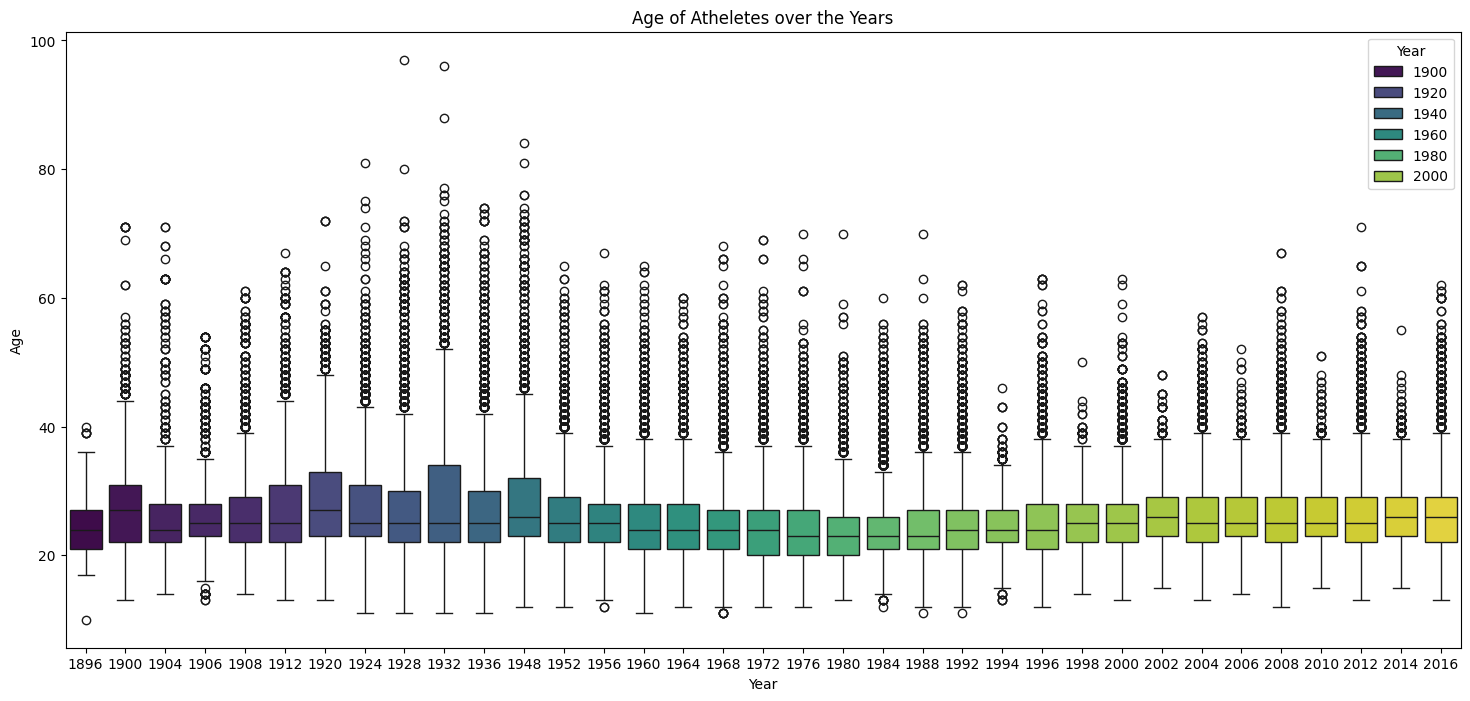

In [ ]:
plt.figure(figsize=(18,8))
sns.boxplot(data=df, x='Year', y='Age', hue='Year', palette='viridis')
plt.title("Age of Atheletes over the Years")
plt.show()

So as we know, most of the participants are between 20-30. But there are still some participants above the age of 60. Let's check out the sports in which people above 60 participates

In [ ]:
df['Sport'][df['Age']>60].value_counts()

,count
Sport,
Art Competitions,218
Shooting,35
Equestrianism,31
Archery,19
Sailing,16
Fencing,3


- The majority of the participants above the age of 60 compete in art competitions. While few others compete in Shooting, Sailing, Equestrianism, Fencing, Archery
- There are a few participants over the age of 80, Let's check them out separately
- All participants over the age of 80 competed in the Art competitions in the Foundational Era
- John Quincy Adams Wardwas the oldest person to ever compete in the history of the olympics. He competed in the Art Competitions at the age of 97 in the 1928 Summer olympics.

In [ ]:
df[['Age', 'Sport']][df['Age']>=80]

,Age,Sport
9351,84,Art Competitions
60446,88,Art Competitions
97443,96,Art Competitions
137939,80,Art Competitions
153817,81,Art Competitions
235501,81,Art Competitions
255544,97,Art Competitions


In [ ]:
df.sort_values(by='Age').head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City,Sport,Event,Medal,Country,BMI,BMI_category,age_category,Event_era,Sports_category
141981,71691,Dimitrios Loundras,M,10,164.0,58.0,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,...,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze,Greece,21.56,Normal Weight,Budding Competitor,Foundational Era,Individual_sport
102221,52070,Etsuko Inada,F,11,168.0,57.0,Japan,JPN,1936 Winter,1936,...,Garmisch-Partenkirchen,Figure Skating,Figure Skating Women's Singles,DNW,Japan,20.20,Normal Weight,Budding Competitor,Foundational Era,Individual_sport
250766,126307,Liana Vicens,F,11,158.0,50.0,Puerto Rico,PUR,1968 Summer,1968,...,Mexico City,Swimming,Swimming Women's 200 metres Breaststroke,DNW,Puerto Rico,20.03,Normal Weight,Budding Competitor,Growth Era,Individual_sport
250765,126307,Liana Vicens,F,11,158.0,50.0,Puerto Rico,PUR,1968 Summer,1968,...,Mexico City,Swimming,Swimming Women's 100 metres Breaststroke,DNW,Puerto Rico,20.03,Normal Weight,Budding Competitor,Growth Era,Individual_sport
139758,70616,Liu Luyang,F,11,168.0,57.0,China,CHN,1988 Winter,1988,...,Calgary,Figure Skating,Figure Skating Mixed Ice Dancing,DNW,China,20.20,Normal Weight,Budding Competitor,Growth Era,Individual_sport


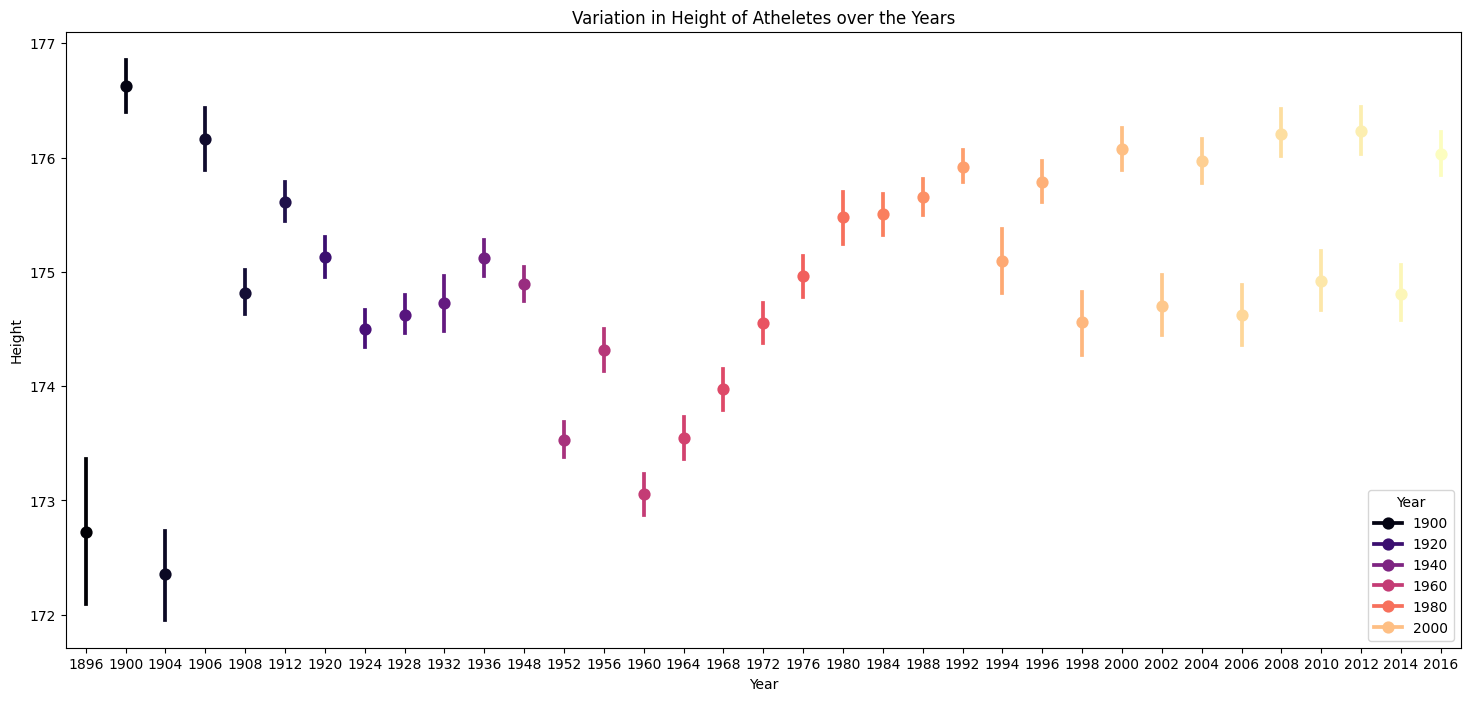

In [ ]:
# Let's check the variation in height
plt.figure(figsize=(18,8))
sns.pointplot(x='Year', y='Height', data=df, hue='Year', palette='magma')
plt.title('Variation in Height of Atheletes over the Years')
plt.show()

- General Trend:
   - The height of athletes has steadily increased over the years.
   - There is a noticeable upward trajectory in average height from 1896 to 2016.

- Key Observations :
   - Early years (1896–1920): Athletes were relatively shorter, with more variability in height.
   - Mid-century (1940–1980): The trend stabilizes, with a more consistent increase in height.
   - Recent years (1980 onwards): Heights plateau slightly but remain at higher levels compared to earlier decades.

- Variability:
   - Error bars in earlier years are larger, indicating more diverse athlete heights.
   - Over time, variability decreases, suggesting more uniform selection criteria or specialized athletic requirements.


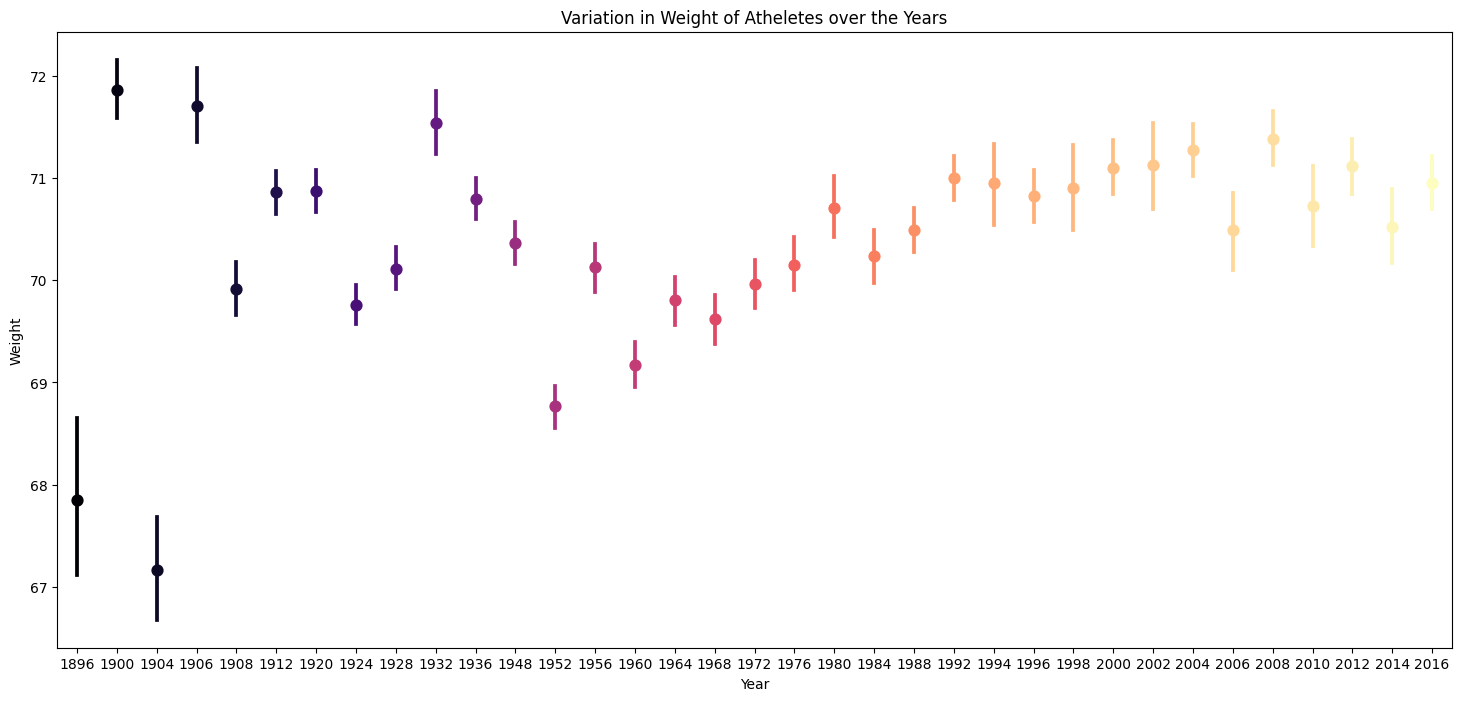

In [ ]:
# Let's check the variation in Weight
plt.figure(figsize=(18,8))
sns.pointplot(data=df, x='Year', y='Weight', hue='Year', palette='magma', legend=False)
plt.title('Variation in Weight of Atheletes over the Years')
plt.show()

Weight Analysis
- General Trend:
   - Like height, the weight of athletes has increased consistently over the years.
   - Weight trends appear closely aligned with height trends.

- Key Observations:
   - Early years (1896–1920): Athletes had lower average weights, with greater variability.
   - Mid-century (1940–1980): A steady increase in average weight is observed, mirroring improvements in nutrition, training, and athletic performance.
   - Recent years (1980 onwards): Weight gains plateau but remain higher compared to earlier decades.

- Variability:
   - Similar to height, variability in weight decreases over time.
   - This aligns with improvements in training and a more standardized athlete profile.


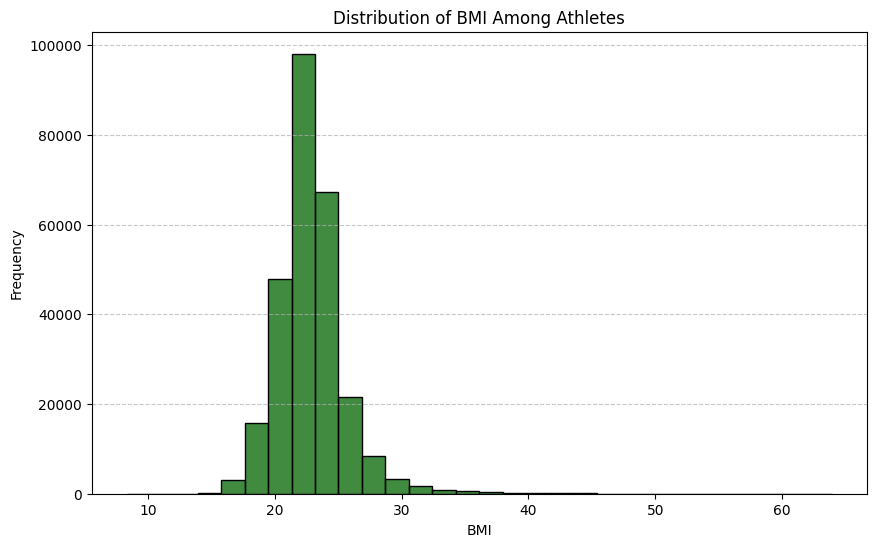

In [ ]:
# Plot the distribution of BMI values
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], bins=30, color='darkgreen', edgecolor='black')
plt.title("Distribution of BMI Among Athletes")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Let's also check the value counts of BMI Category
df['BMI_category'].value_counts().reset_index()

,BMI_category,count
0,Normal Weight,220717
1,Overweight,33038
2,Underweight,8308
3,Obese,7451


In [ ]:
# Let's check the sports event in which the BMI category is marked as Obese
df['Event'][df['BMI_category']=='Obese'].value_counts().head(10)

,count
Event,
Athletics Men's Shot Put,393
Athletics Men's Hammer Throw,366
Athletics Men's Discus Throw,363
Weightlifting Men's Heavyweight,270
Judo Men's Heavyweight,231
Weightlifting Men's Middle-Heavyweight,222
Weightlifting Men's Super-Heavyweight,196
Bobsleigh Men's Four,172
"Wrestling Men's Super-Heavyweight, Freestyle",166


- The distribution of BMI among the athletes shows that most of the athletes are very fit with values between 18 and 25
- There are some values below this mark as well as some above this mark. But this is to be expected as some of the sports require the athletes to be more lean and some require them to be more muscular
- Checked the rows in which the BMI category was set as obese and the sports event are

  - Athletics Men's Shot Put
  - Athletics Men's Hammer Throw
  - Athletics Men's Discus Throw
  - Weightlifting Men's Heavyweight
  - Judo Men's Heavyweight
  - Weightlifting Men's Middle-Heavyweight
  - Weightlifting Men's Super-Heavyweight
  - Bobsleigh Men's Four
  - Wrestling Men's Super-Heavyweight
  - Freestyle Wrestling Men's Super-Heavyweight

- All of these events require the athletes to have a lot of muscle mass. BMI only takes the weight and height into consideration, not muscle mass and fat mass.




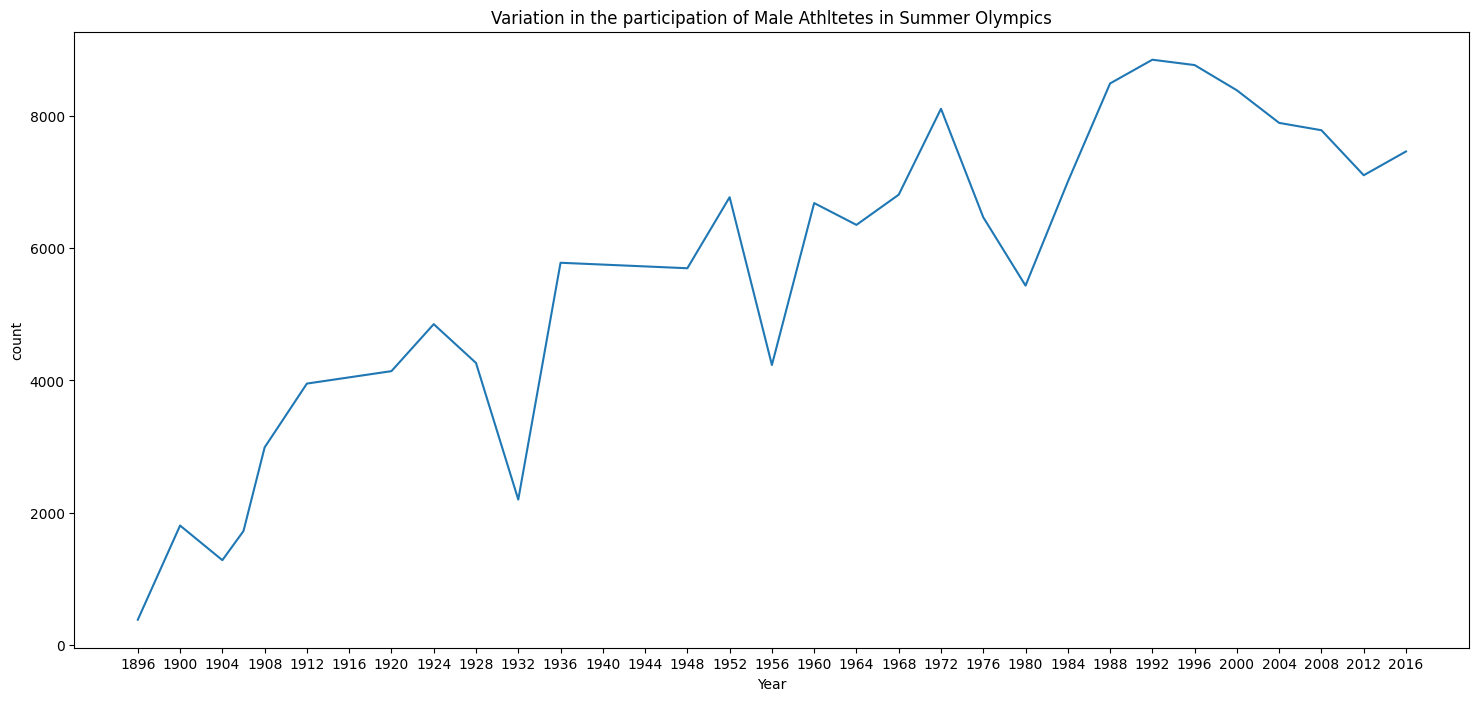

In [ ]:
# Variation in the participation of Male and Female Athltetes during different season-
male_athletes_in_summer_olympics = df[(df['Sex']=='M')  & (df['Season']=='Summer')]
male_participation = male_athletes_in_summer_olympics.groupby('Year')['Sex'].value_counts().reset_index()

plt.figure(figsize=(18,8))
plt.title("Variation in the participation of Male Athltetes in Summer Olympics")
plt.xticks(range(1896, 2017, 4))
sns.lineplot(data=male_participation, x="Year", y="count",)
plt.show()

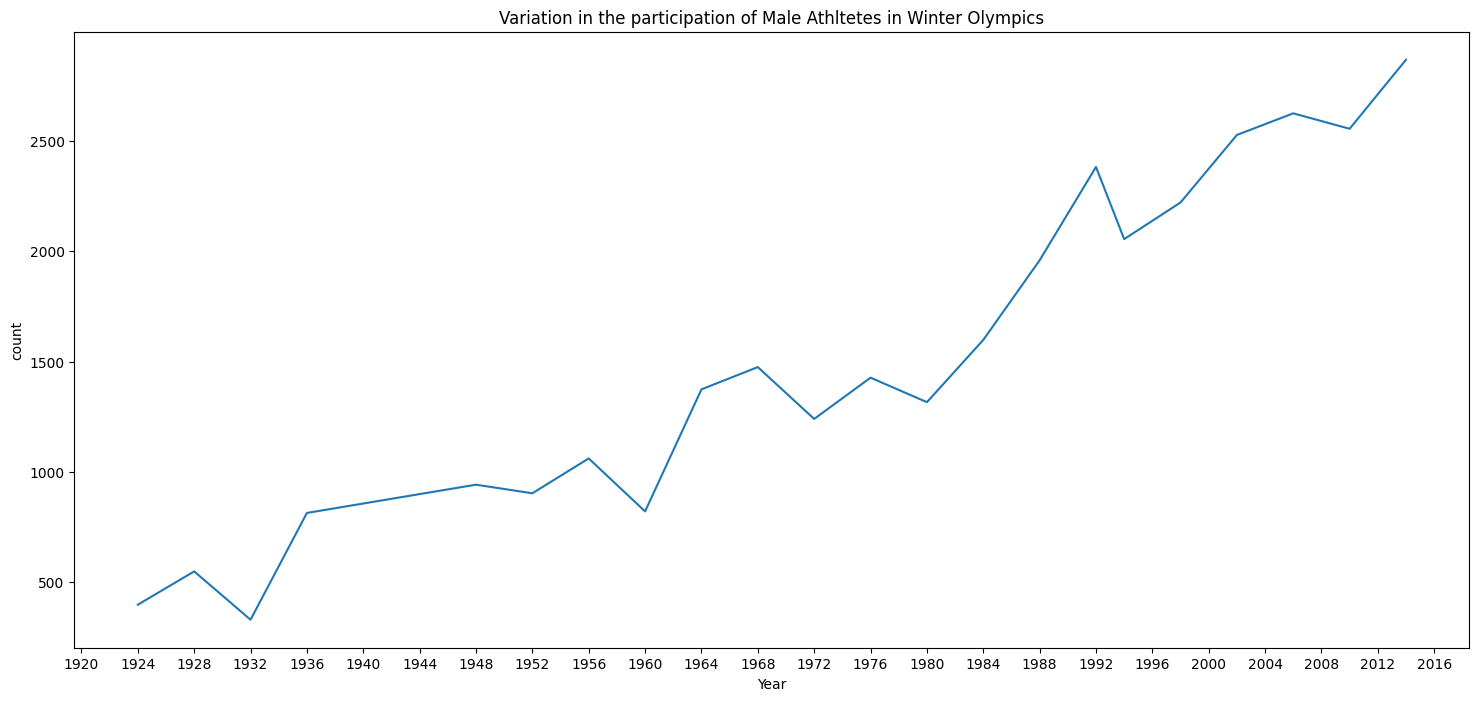

In [ ]:
male_athletes_in_winter_olympics = df[(df['Sex']=='M')  & (df['Season']=='Winter')]
male_participation = male_athletes_in_winter_olympics.groupby('Year')['Sex'].value_counts().reset_index()

plt.figure(figsize=(18,8))
plt.title("Variation in the participation of Male Athltetes in Winter Olympics")
plt.xticks(range(1896, 2017, 4))
sns.lineplot(data=male_participation, x="Year", y="count",)
plt.show()

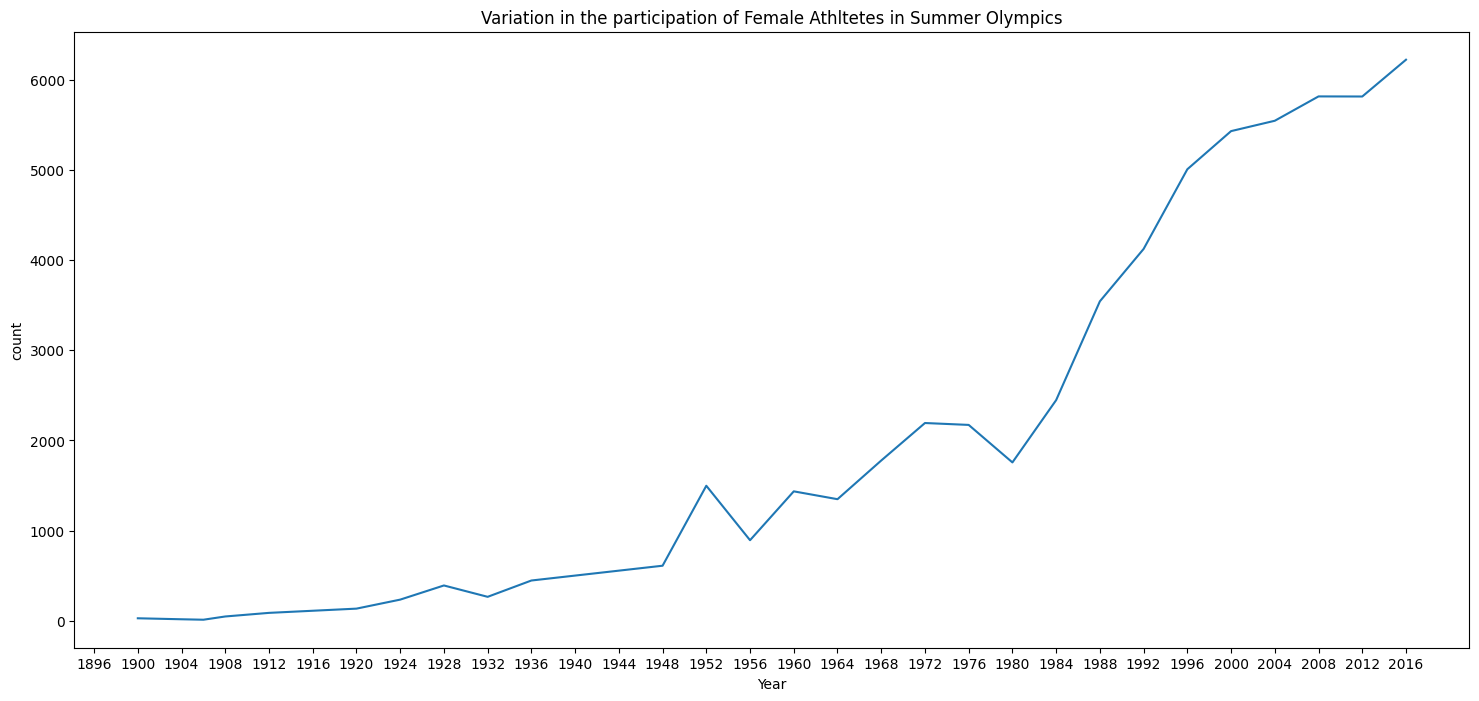

In [ ]:
female_athletes_in_summer_olympics = df[(df['Sex']=='F')  & (df['Season']=='Summer')]
female_participation = female_athletes_in_summer_olympics.groupby('Year')['Sex'].value_counts().reset_index()

plt.figure(figsize=(18,8))
plt.title("Variation in the participation of Female Athltetes in Summer Olympics")
plt.xticks(range(1896, 2017, 4))
sns.lineplot(data=female_participation, x="Year", y="count",)
plt.show()

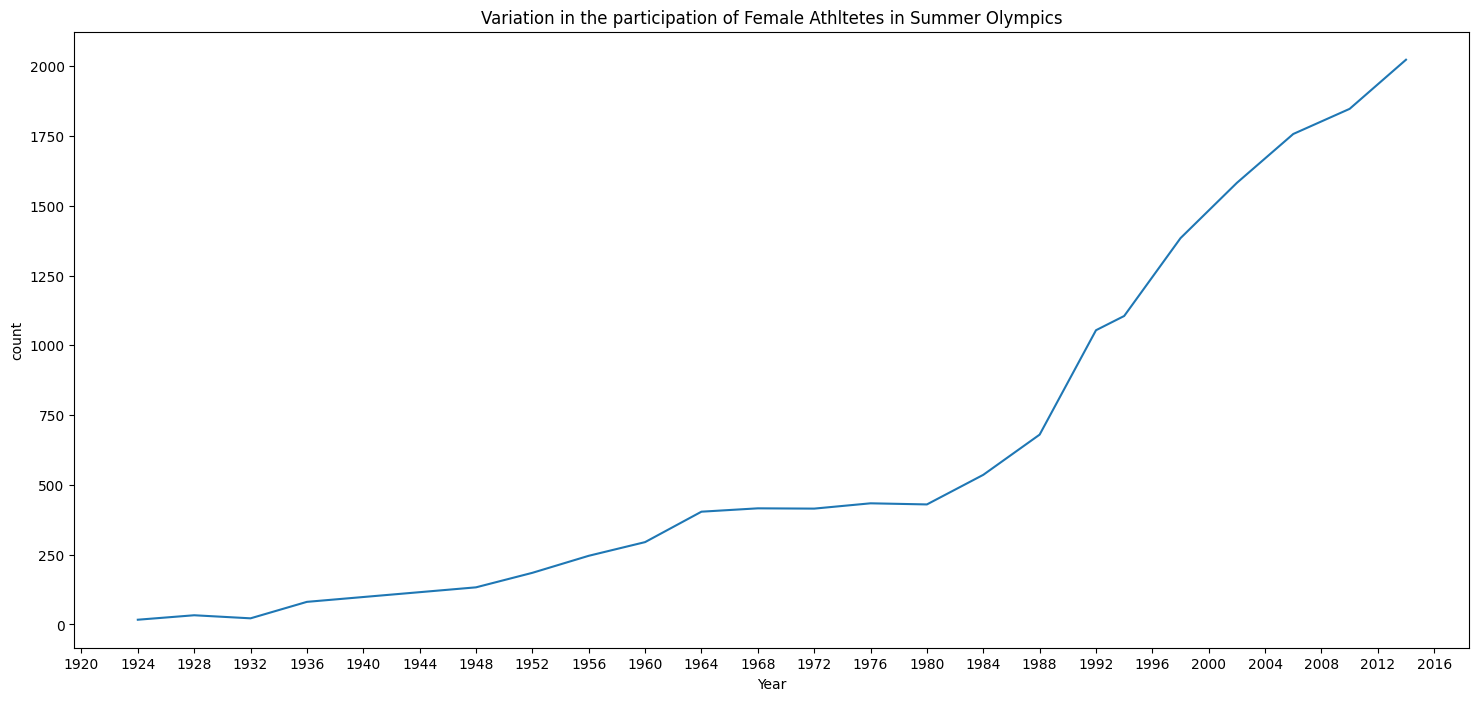

In [ ]:
male_athletes_in_winter_olympics = df[(df['Sex']=='F')  & (df['Season']=='Winter')]
female_participation = male_athletes_in_winter_olympics.groupby('Year')['Sex'].value_counts().reset_index()

plt.figure(figsize=(18,8))
plt.title("Variation in the participation of Female Athltetes in Summer Olympics")
plt.xticks(range(1896, 2017, 4))
sns.lineplot(data=female_participation, x="Year", y="count",)
plt.show()

- Male participation in Summer olympics has increased from less than 1000 in 1896 to an average of 8000 in the recent years
- There has been three times in the history of the summer olympics where male participation had a sudden decrease. This was in the years - 1932, 1956, 1976 and 1980
  - The 1932 Summer Olympics, held in Los Angeles, saw a significant decrease in participation compared to previous games. There were several reasons for this:
    - The Great Depression
    - Geographical Location
    - Political Tensions

  - In 1956, the remoteness of Australia and two international crises accounted for the low number of participants; fewer than 3,500 athletes from 67 countries attended the Games. Many countries boycotted in protest of the Israeli invasion of the Sinai Peninsula

  - The 1976 Olympic Games held in Montreal, Canada, are remembered in sports history as the "Black Year of Montreal". 22+ nations boycotted the olympics in protest of the presence of New Zealand in the competition.

  - The boycott of 1980 Summer Olympics in Moscow was the largest boycott in Olympic history and one part of a number of actions initiated by the USA to protest against the Soviet invasion of Afghanistan.

- Compared to summer olympics, male participation is less than half in winter olympics. The Maximum male participation in winter olympics is around 2500

- Female Participation in both Summer and Winter Olympics shows a gradual increase from 1896 to the 1980s and then a steep increase from the late 1980s until now
- Similar to that of male participation, the female participation in summer olympics is more than double that of in the winter olympics



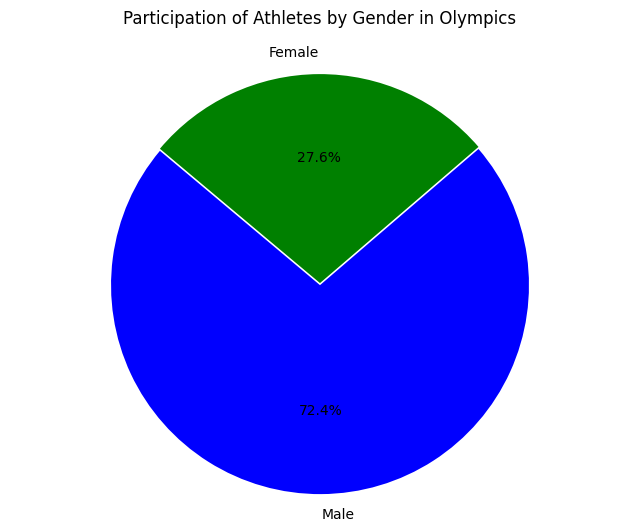

In [ ]:
# Ratio of participation of Male and Female Athletes
ratio_of_part = df['Sex'].value_counts().reset_index()
plt.figure(figsize=(8, 6))
plt.pie(ratio_of_part['count'], labels=["Male", 'Female'], autopct='%1.1f%%', startangle=140, colors=['blue', 'green'],explode=(0.01, 0))
plt.title("Participation of Athletes by Gender in Olympics\n")
plt.axis('equal')
plt.show()

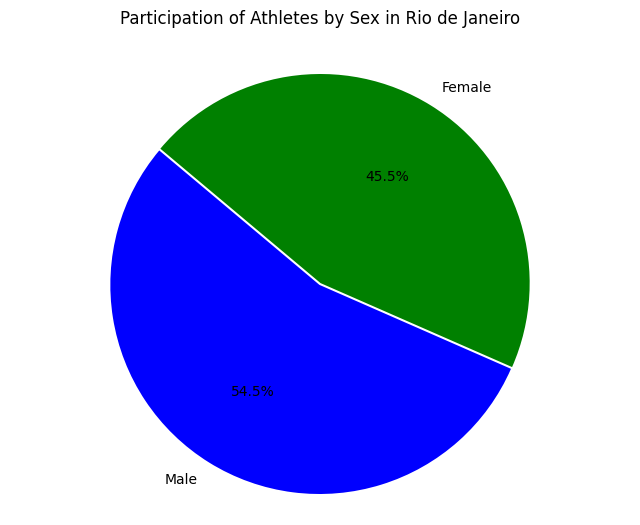

In [ ]:
part_in_rio = df['Sex'][df['Year']==2016].value_counts().reset_index()

plt.figure(figsize=(8, 6))
plt.pie(part_in_rio['count'], labels=["Male", 'Female'], autopct='%1.1f%%', startangle=140, colors=['blue', 'green'],explode=(0.01, 0))
plt.title("Participation of Athletes by Sex in Rio de Janeiro\n")
plt.axis('equal')
plt.show()

- participation of Male and Female Athletes throughout the history of the Olympics
  - From the total participants throughout the history, only 27.6 percentage of participants are Female Athletes
  - The rest, 72.4 percentage of participants are Male Athletes

- participation of Male and Female Athletes During the 2016 Olympics in Rio de Janeiro
  - From the total participants in Rio de Janeiro, 45.5 percentage of participants are Female Athletes
  - The rest, 55.5 percentage of participants are Male Athletes

- We can certainly see the increased participation of Female Athletes in the 2016 Olympics


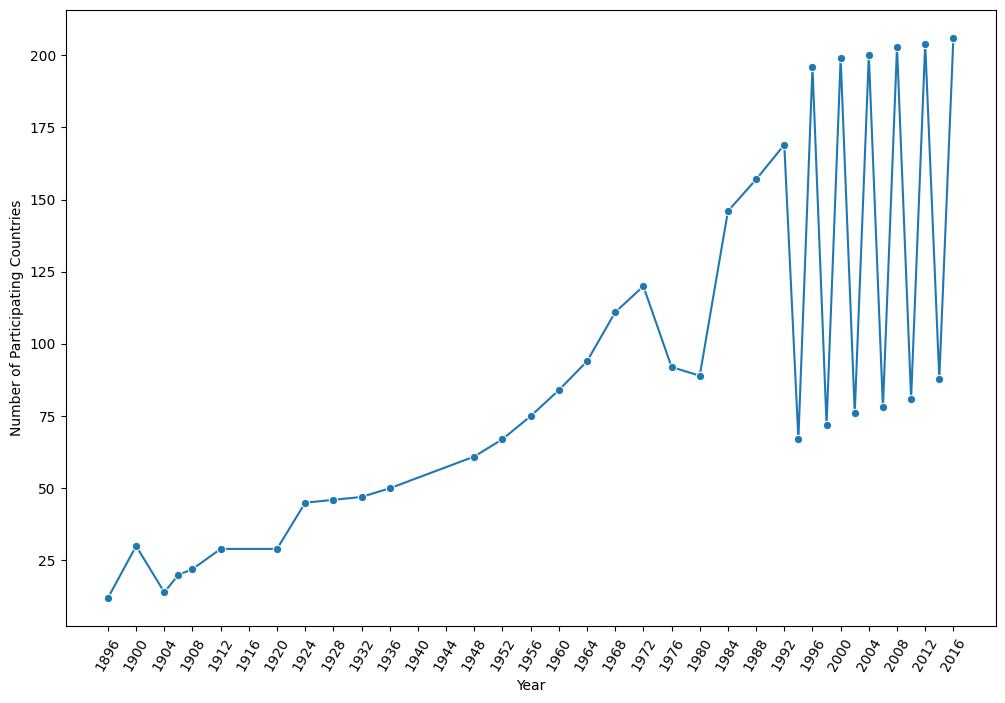

In [ ]:
# variation in number of participating countries
participating_countries_per_year = df.groupby(['Year'])['Country'].nunique().reset_index()

plt.figure(figsize=(12,8))
sns.lineplot(data=participating_countries_per_year, x="Year", y='Country', marker="o")
plt.xticks(range(1896, 2017, 4), rotation=60)
plt.ylabel("Number of Participating Countries")
plt.show()

- variation in number of participating countries
- We can observe a gradual increase in the number of countries participating in the Olympics throughout the years, from less than 25 countries to more than 200 countries.
- We can also observe that a lot of countries participates in the summer olympics but not in the winter olympics

In [ ]:
# Let's see the average age, height and weight of athletes in different sports
sports_by_athletes = df.groupby('Sport')[['Age', 'Height', 'Weight']].mean().round().reset_index()
sports_by_athletes.head()

,Sport,Age,Height,Weight
0,Alpine Skiing,23.0,173.0,72.0
1,Archery,28.0,173.0,70.0
2,Art Competitions,45.0,175.0,76.0
3,Athletics,25.0,176.0,69.0
4,Badminton,26.0,174.0,68.0


In [ ]:
x = sports_by_athletes['Age'].agg(['min', 'max'])
sports_by_athletes[sports_by_athletes['Age'].isin(x)]

,Sport,Age,Height,Weight
2,Art Competitions,45.0,175.0,76.0
32,Rhythmic Gymnastics,19.0,168.0,49.0


In [ ]:
x = sports_by_athletes['Height'].agg(['min', 'max'])
sports_by_athletes[sports_by_athletes['Height'].isin(x)]

,Sport,Age,Height,Weight
6,Basketball,25.0,191.0,86.0
22,Gymnastics,23.0,163.0,57.0


In [ ]:
x = sports_by_athletes['Weight'].agg(['min', 'max'])
sports_by_athletes[sports_by_athletes['Weight'].isin(x)]

,Sport,Age,Height,Weight
32,Rhythmic Gymnastics,19.0,168.0,49.0
51,Tug-Of-War,29.0,182.0,95.0


- Age
  - Rhythmic Gymnastics has the lowest average - 19.0
  - Art Competitions has the Highest average -	45.0

- Height
  - Gymnastics has the lowest average - 163.0
  - Basketball has the highest average - 191.0

- Weight
  - Rhythmic Gymnastics has the lowest average - 49.0
  - Tug-Of-War has the highest average - 95.0

#### Medal related analysis
- Total Number of Athletes That has Participated in Olympics = 135390
- Total Number of Athletes That has won an Olympic Medal = 28107
- Percentage of Athletes That has won an Olympic Medal = 20.76002658985154
- Total Number of Athletes That has won an Olympic Gold Medal = 10351
- Total Number of Athletes That has won an Olympic Silver Medal = 11395
- Total Number of Athletes That has won an Olympic Bronze Medal = 11848

- There are seven athletes that hold the record of being
the youngest person to be an olypmic gold medalist at the age of 13
  - Hans Bourquin - Rowing
  - Fu Mingxia - Diving
  - Kim Yun-Mi - Short Track Speed Skating
  - Donna Elizabeth de Varona	- Swimming
  - Marjorie Gestring -	Diving
  - Klaus Zerta - Rowing
  - Aileen Muriel Riggin - Diving

- Oscar Gomer Swahn holds the record of being the oldest person to acheive an olympic gold medal at the age of 64	for Shooting

- Youngest person ever to win a medal - Dimitrios Loundras at the age of 10 for	Gymnastics Men's Parallel Bars (Bronze Medal)
- Oldest Person ever to win a medal - John Copley at the age of	73 for Art Competitions Mixed Painting, Graphic Arts	(Silver)

- Michael Fred Phelps holds the record of most gold medals (23) and most overall medals (28)
- 5 People holds the record of most silver medals -	6
  - Aleksandr Vladimirovich Popov
  - Shirley Frances Babashoff
  - Yang Yang
  - Mikhail Yakovlevich Voronin
  - Aleksandr Nikolayevich Dityatin
- 5 People holds the record of most bronze medals -	6
  - Franziska van Almsick
  - Heikki Ilmari Savolainen
  - Merlene Joyce Ottey-Page
  - Harri Tapani Kirvesniemi
  - Aleksey Yuryevich Nemov

- Top 5 Athletes Who Have the most number of medals in their respective Sport
  - Michael Fred Phelps, II	28 Swimming
  - Larysa Semenivna Latynina 18 Gymnastics
  - Edoardo Mangiarotti	13 Fencing
  - Ole Einar Bjrndalen	13 Biathlon
  - Paavo Johannes Nurmi 12 Athletics

- An Overwhelming number of medals are won by Rising Competitors. This age category have won 21739 medals which is more than double the number of medals won by seasoned competitors, which is 9700. Seasoned Competitor are followed by Budding Competitors	with a total of 5426 medals and lastly, the Senior Competitors with 2752 medals

- Budding competitors have mostly won medals in the following sports
  - Swimming	1461
  - Gymnastics	656
  - Athletics	408
  - Rowing	277
  - Boxing	232

- Senior competitors have mostly won medals in the following sports
  - Equestrianism	475
  - Shooting	465
  - Sailing	368
  - Fencing	296
  - Art Competitions	118

- Athletes over 60 have mostly won medals in the following sports
  - Archery	11
  - Art Competitions	9
  - Shooting	4
  - Sailing	3
  - Equestrianism	2


In [ ]:
# Let's check what percentage of the athletes that participates in the olympics actually wins a medal
total_number_of_athletes = df['ID'].nunique()
total_gold_medalists = df['ID'][df['Medal']!='DNW'].nunique()
print(f"Total Number of Athletes That has Participated in Olympics = {total_number_of_athletes}")
print(f"Total Number of Athletes That has won an Olympic Medal = {total_gold_medalists}")
print(f"Percentage of Athletes That has won an Olympic Medal = {(total_gold_medalists/total_number_of_athletes)*100}")
print(f"Total Number of Athletes That has won an Olympic Gold Medal = {df['ID'][df['Medal']=='Gold'].nunique()}")
print(f"Total Number of Athletes That has won an Olympic Silver Medal = {df['ID'][df['Medal']=='Silver'].nunique()}")
print(f"Total Number of Athletes That has won an Olympic Bronze Medal = {df['ID'][df['Medal']=='Bronze'].nunique()}")


Total Number of Athletes That has Participated in Olympics = 135390
Total Number of Athletes That has won an Olympic Medal = 28107
Percentage of Athletes That has won an Olympic Medal = 20.76002658985154
Total Number of Athletes That has won an Olympic Gold Medal = 10351
Total Number of Athletes That has won an Olympic Silver Medal = 11395
Total Number of Athletes That has won an Olympic Bronze Medal = 11848


In [ ]:
df[['Name', 'Age', 'Medal', 'Sport']][df['Medal']=='Gold'].sort_values(by="Age").head(10)

,Name,Age,Medal,Sport
27022,Hans Bourquin,13,Gold,Rowing
73090,Fu Mingxia,13,Gold,Diving
118519,Kim Yun-Mi,13,Gold,Short Track Speed Skating
51677,Donna Elizabeth de Varona (-Pinto),13,Gold,Swimming
78016,Marjorie Gestring (-Redlick),13,Gold,Diving
267006,Klaus Zerta,13,Gold,Rowing
199460,Aileen Muriel Riggin (-Soule),13,Gold,Diving
43509,Nadia Elena Comneci (-Conner),14,Gold,Gymnastics
68754,Mariya Yevgenyevna Filatova (-Kurbatova),14,Gold,Gymnastics
238588,Gunther Tiersch,14,Gold,Rowing


In [ ]:
df[['Name', 'Age', 'Medal', 'Sport']][df['Medal']=='Gold'].sort_values(by="Age", ascending=False).head()

,Name,Age,Medal,Sport
231986,Oscar Gomer Swahn,64,Gold,Shooting
259564,"Robert W. Williams, Jr.",63,Gold,Archery
189747,"Lida Peyton ""Eliza"" Pollock (McMillen-)",63,Gold,Archery
103302,Isaac Lazarus Israls,63,Gold,Art Competitions
224989,"Galen Carter ""G. C."" Spencer",63,Gold,Archery


In [ ]:
df[['Name', 'Age', 'Medal', 'Sport']][df['Medal']!='DNW'].sort_values(by="Age").head()

,Name,Age,Medal,Sport
141981,Dimitrios Loundras,10,Bronze,Gymnastics
78490,Luigina Giavotti,11,Silver,Gymnastics
191296,Dorothy Poynton-Hill (-Teuber),12,Silver,Diving
250035,Ines Vercesi,12,Silver,Gymnastics
224635,Inge Srensen (-Tabur),12,Bronze,Swimming


In [ ]:
df[['Name', 'Age', 'Medal', 'Sport']][df['Medal']!='DNW'].sort_values(by="Age", ascending=False).head()

,Name,Age,Medal,Sport
44317,John (Herbert Crawford-) Copley (Williamson-),73,Silver,Art Competitions
59603,Jozu Dupon,72,Bronze,Art Competitions
231991,Oscar Gomer Swahn,72,Silver,Shooting
149780,Charles William Martin,71,Silver,Sailing
149781,Charles William Martin,71,Bronze,Sailing


In [ ]:
gold_medalists = df[df['Medal']=='Gold']
gold_medalists_count = gold_medalists.groupby("Name")['Medal'].count().reset_index()
gold_medalists_count.sort_values(by='Medal', ascending=False).head(5)

,Name,Medal
6575,"Michael Fred Phelps, II",23
7773,"Raymond Clarence ""Ray"" Ewry",10
7326,Paavo Johannes Nurmi,9
5536,Larysa Semenivna Latynina (Diriy-),9
6278,Mark Andrew Spitz,9


In [ ]:
silver_medalists = df[df['Medal']=='Silver']
silver_medalists_count = silver_medalists.groupby("Name")['Medal'].count().reset_index()
silver_medalists_count.sort_values(by='Medal', ascending=False).head(10)

,Name,Medal
259,Aleksandr Vladimirovich Popov,6
9465,Shirley Frances Babashoff,6
11009,Yang Yang,6
7437,Mikhail Yakovlevich Voronin,6
230,Aleksandr Nikolayevich Dityatin,6
567,Andrea Ehrig-Schne-Mitscherlich,5
8605,Raisa Petrovna Smetanina,5
11205,Yury Yevlampiyevich Titov,5
9971,"Theodora Elisabeth Gerarda ""Anky"" van Grunsven",5
6275,Leisel Marie Jones,5


In [ ]:
Bronze_medalists = df[df['Medal']=='Bronze']
Bronze_medalists_count = Bronze_medalists.groupby("Name")['Medal'].count().reset_index()
Bronze_medalists_count.sort_values(by='Medal', ascending=False).head(10)

,Name,Medal
3276,Franziska van Almsick,6
4184,Heikki Ilmari Savolainen,6
7592,Merlene Joyce Ottey-Page,6
4109,Harri Tapani Kirvesniemi,6
296,Aleksey Yuryevich Nemov,6
904,Antje Buschschulte (-Meeuw),5
7983,Natalie Anne Coughlin (-Hall),5
10057,Stefania Belmondo,5
74,"Adrianus Egbert Willem ""Arie"" de Jong",5
8814,"Philip Aron ""Phil"" Edwards",5


In [ ]:
medalists = df[df['Medal']!='DNW']
medalists_count = medalists.groupby("Name")['Medal'].count().reset_index()
medalists_count.sort_values(by='Medal', ascending=False).head()

,Name,Medal
17974,"Michael Fred Phelps, II",28
15209,Larysa Semenivna Latynina (Diriy-),18
19239,Nikolay Yefimovich Andrianov,15
24257,Takashi Ono,13
19555,Ole Einar Bjrndalen,13


In [ ]:
# Let's check out which athletes hold the most medal in their respective sport
medalists = df[df['Medal']!='DNW']
medal_count = medalists.groupby(["Sport", "Name"])['Medal'].count().reset_index()
most_medal_per_sport = medal_count.loc[medal_count.groupby('Sport')['Medal'].idxmax()].sort_values(by='Medal', ascending=False)
most_medal_per_sport.head(5)

,Sport,Name,Medal
23763,Swimming,"Michael Fred Phelps, II",28
12703,Gymnastics,Larysa Semenivna Latynina (Diriy-),18
9349,Fencing,Edoardo Mangiarotti,13
4906,Biathlon,Ole Einar Bjrndalen,13
2722,Athletics,Paavo Johannes Nurmi,12


In [ ]:
medalists.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City,Sport,Event,Medal,Country,BMI,BMI_category,age_category,Event_era,Sports_category
3,4,Edgar Lindenau Aabye,M,34,182.0,95.0,Denmark/Sweden,DEN,1900 Summer,1900,...,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,28.68,Overweight,Seasoned Competitor,Foundational Era,Team_sport
37,15,Arvo Ossian Aaltonen,M,30,178.0,70.0,Finland,FIN,1920 Summer,1920,...,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,22.09,Normal Weight,Seasoned Competitor,Foundational Era,Individual_sport
38,15,Arvo Ossian Aaltonen,M,30,178.0,70.0,Finland,FIN,1920 Summer,1920,...,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,22.09,Normal Weight,Seasoned Competitor,Foundational Era,Individual_sport
40,16,Juhamatti Tapio Aaltonen,M,28,184.0,85.0,Finland,FIN,2014 Winter,2014,...,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland,25.11,Overweight,Seasoned Competitor,Modern Era,Team_sport
41,17,Paavo Johannes Aaltonen,M,28,175.0,64.0,Finland,FIN,1948 Summer,1948,...,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,20.90,Normal Weight,Seasoned Competitor,Foundational Era,Individual_sport


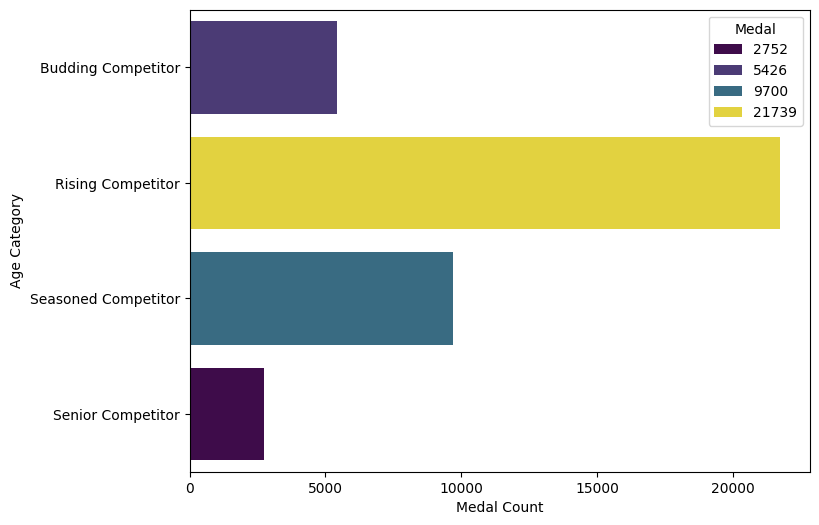

In [ ]:
# Let's check which age group has won the most medals
medals_age_group = medalists.groupby('age_category')['Medal'].count().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=medals_age_group, y='age_category', x='Medal', hue='Medal', palette='viridis')
plt.xlabel("Medal Count")
plt.ylabel("Age Category")
plt.show()

- An Overwhelming number of medals are won by Rising Competitors. This age category have won 21739 medals which is more than double the number of medals won by seasoned competitors, which is 9700. Seasoned Competitor are followed by Budding Competitors	with a total of 5426 medals and lastly, the Senior Competitors with 2752 medals

- Budding competitors have mostly won medals in the following sports
  - Swimming	1461
  - Gymnastics	656
  - Athletics	408
  - Rowing	277
  - Boxing	232

- Senior competitors have mostly won medals in the following sports
  - Equestrianism	475
  - Shooting	465
  - Sailing	368
  - Fencing	296
  - Art Competitions	118

- Athletes over 60 have mostly won medals in the following sports
  - Archery	11
  - Art Competitions	9
  - Shooting	4
  - Sailing	3
  - Equestrianism	2

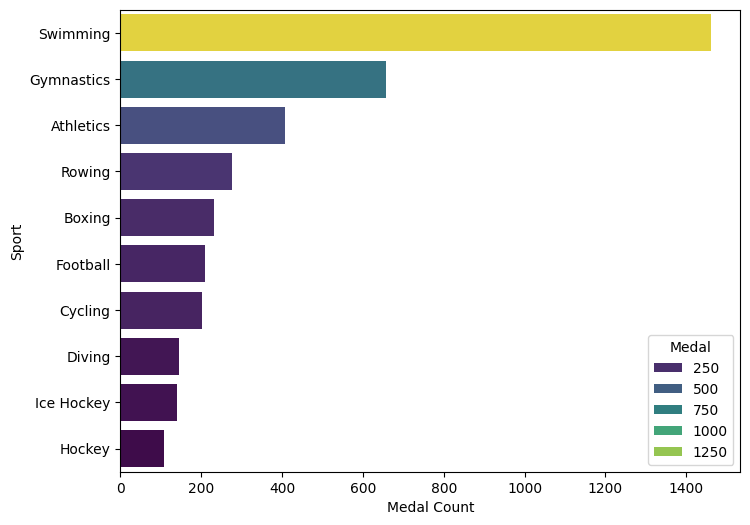

In [ ]:
# Let's see which sports the Budding Competitors excel in..
budding_athletes = medalists[medalists['age_category']=='Budding Competitor'].groupby('Sport')['Medal'].count().reset_index()
budding_athletes.sort_values(by='Medal', inplace=True, ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(data=budding_athletes.head(10), y='Sport', x='Medal', hue='Medal', palette='viridis')
plt.xlabel("Medal Count")
plt.show()

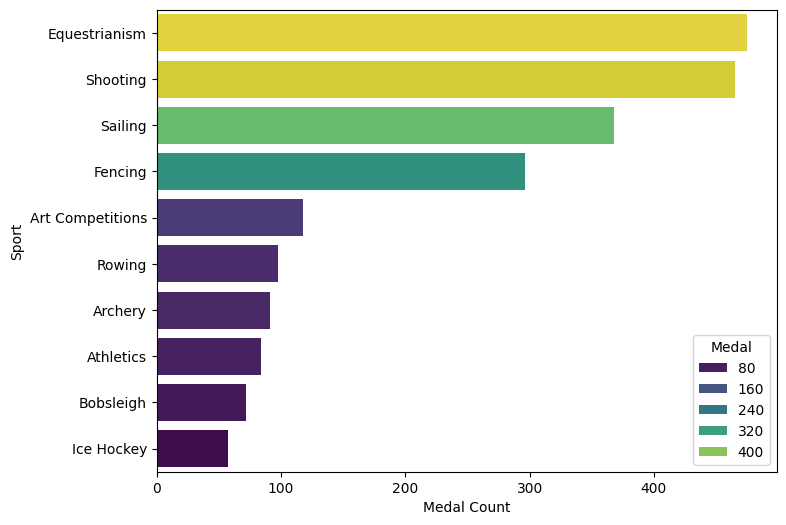

In [ ]:
# Let's do the same for senior competitors
senior_athletes = medalists[medalists['age_category']=='Senior Competitor'].groupby('Sport')['Medal'].count().reset_index()
senior_athletes.sort_values(by='Medal', inplace=True, ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(data=senior_athletes.head(10), y='Sport', x='Medal', hue='Medal', palette='viridis')
plt.xlabel("Medal Count")
plt.show()

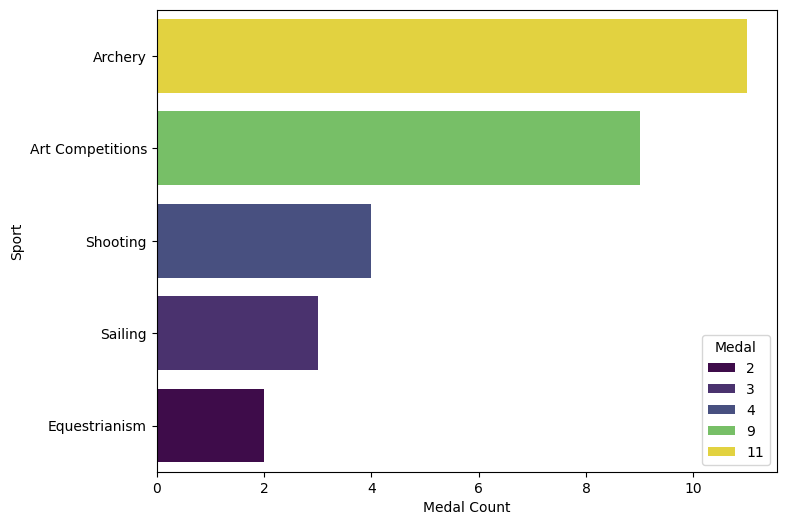

In [ ]:
# Let's check the sports in which athletes above 60 participates in and has won a gold medal
medalists_over_60 = medalists[medalists['Age']>60].groupby("Sport")['Medal'].count().reset_index().sort_values(by='Medal', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(data=medalists_over_60.head(10), y='Sport', x='Medal', hue='Medal', palette='viridis')
plt.xlabel("Medal Count")
plt.show()

#### Country Based Analysis

- The United States leads with the highest medal count, boasting 5,621 medals. Russia holds the second position with 3,947 medals, approximately 1,600 fewer than the USA. Germany ranks third with a total of 3,754 medals.

- The United States dominates the gold medal tally with 2,634 golds. Russia follows in second place with 1,599 gold medals, trailing the USA by over 1,000. Germany secures the third position with 1,299 gold medals.  

- The United States leads in silver medals with a total of 1,635. Germany takes second place with 1,195 silver medals, while Russia closely follows in third place with 1,170 silver medals.  

- The United States tops the list for bronze medals with 1,352. Germany comes in second with 1,260 bronze medals, and Russia secures third place with 1,178 bronze medals.

- It is very clear that USA, Russia and Germany are the Big 3 in Olympics.


In [ ]:
medal_country = medalists.groupby('Country')['Medal'].value_counts().reset_index()
medal_country.head()

,Country,Medal,count
0,Afghanistan,Bronze,2
1,Algeria,Bronze,8
2,Algeria,Gold,5
3,Algeria,Silver,4
4,Argentina,Silver,92


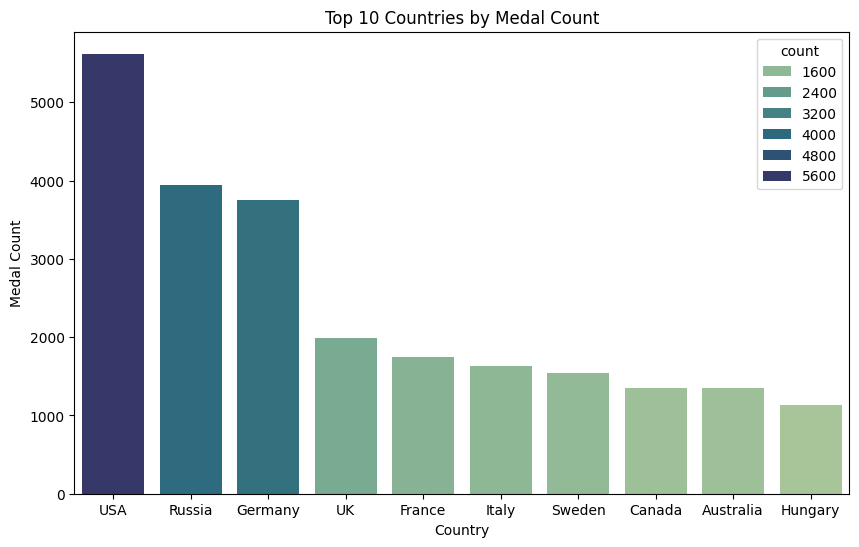

In [ ]:
total_medals_per_country = medal_country.groupby('Country')['count'].sum().reset_index().sort_values(by="count", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=total_medals_per_country.head(10), x='Country', y='count', hue='count', palette=sns.color_palette("crest", as_cmap=True))
plt.title("Top 10 Countries by Medal Count")
plt.ylabel("Medal Count")
plt.show()

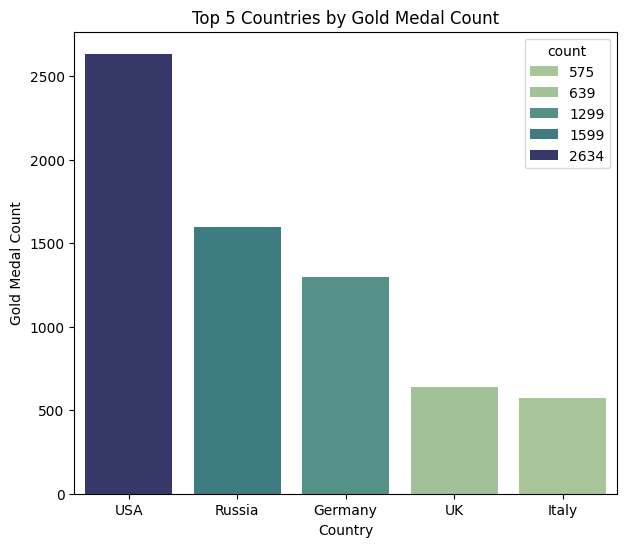

In [ ]:
# Now let's figure out the countries with the most gold medals, most silver medals and most bronze medals
total_gold_medal_per_country = medal_country[medal_country['Medal']=='Gold'].sort_values(by="count", ascending=False).head()

plt.figure(figsize=(7,6))
sns.barplot(data=total_gold_medal_per_country, x='Country', y='count', hue='count', palette=sns.color_palette("crest", as_cmap=True))
plt.title("Top 5 Countries by Gold Medal Count")
plt.ylabel("Gold Medal Count")
plt.show()

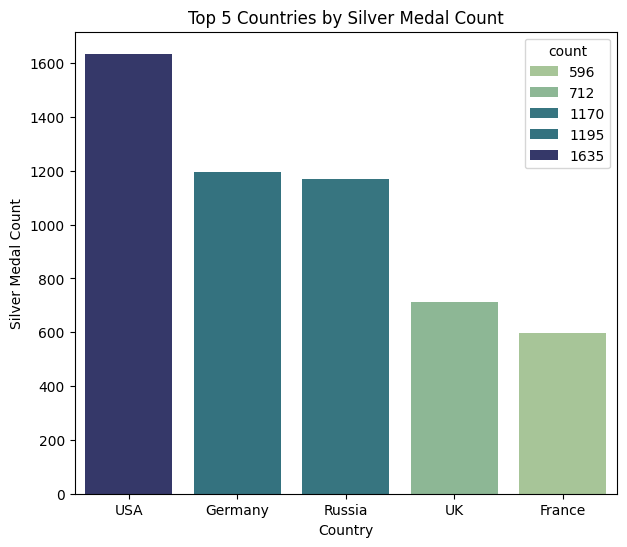

In [ ]:
total_silver_medal_per_country = medal_country[medal_country['Medal']=='Silver'].sort_values(by="count", ascending=False).head()

plt.figure(figsize=(7,6))
sns.barplot(data=total_silver_medal_per_country.head(), x='Country', y='count', hue='count', palette=sns.color_palette("crest", as_cmap=True))
plt.title("Top 5 Countries by Silver Medal Count")
plt.ylabel("Silver Medal Count")
plt.show()

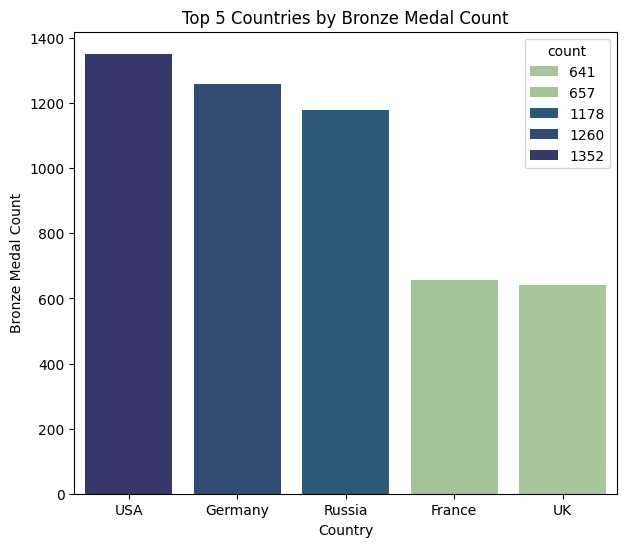

In [ ]:
total_Bronze_medal_per_country = medal_country[medal_country['Medal']=='Bronze'].sort_values(by="count", ascending=False).head()

plt.figure(figsize=(7,6))
sns.barplot(data=total_Bronze_medal_per_country, x='Country', y='count', hue='count', palette=sns.color_palette("crest", as_cmap=True))
plt.title("Top 5 Countries by Bronze Medal Count")
plt.ylabel("Bronze Medal Count")
plt.show()

Let's check out a few more things about the top 1 country in olympics - USA

let's see the number of medals won in each era by USA

- The United States has showcased its dominance in three distinct eras of competition, securing 1650 medals during the Foundational Era, an impressive 2582 medals in the Growth Era, and 1389 medals in the Modern Era.

- Considering that both the Foundational and Growth Eras spanned 50 years, the increase in medals achieved by the USA during the Growth Era highlights significant improvement.

- Based on the current trajectory, with 1,389 medals already secured in just 16 years of the Modern Era, it is reasonable to project that the USA will surpass the medal count of the Growth Era by the time the Modern Era concludes.

- It seems USA Has won the most number of medals in the event of Men's BasketBall which is not surprising as the USA have a lot great players to choose from the NBA.

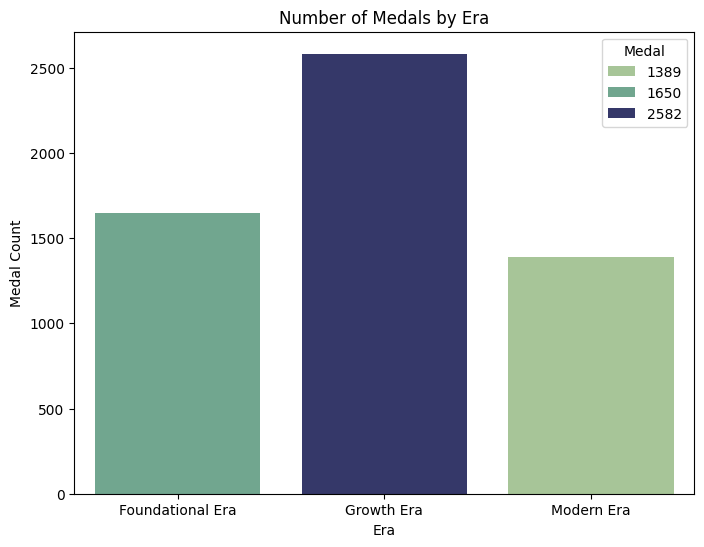

In [ ]:
medalists_usa = medalists[medalists['Country']=='USA']
usa_each_era = medalists_usa.groupby("Event_era")['Medal'].count().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=usa_each_era, x='Event_era', y='Medal', hue='Medal', palette=sns.color_palette("crest", as_cmap=True))
plt.title("Number of Medals by Era")
plt.xlabel("Era")
plt.ylabel("Medal Count")
plt.show()

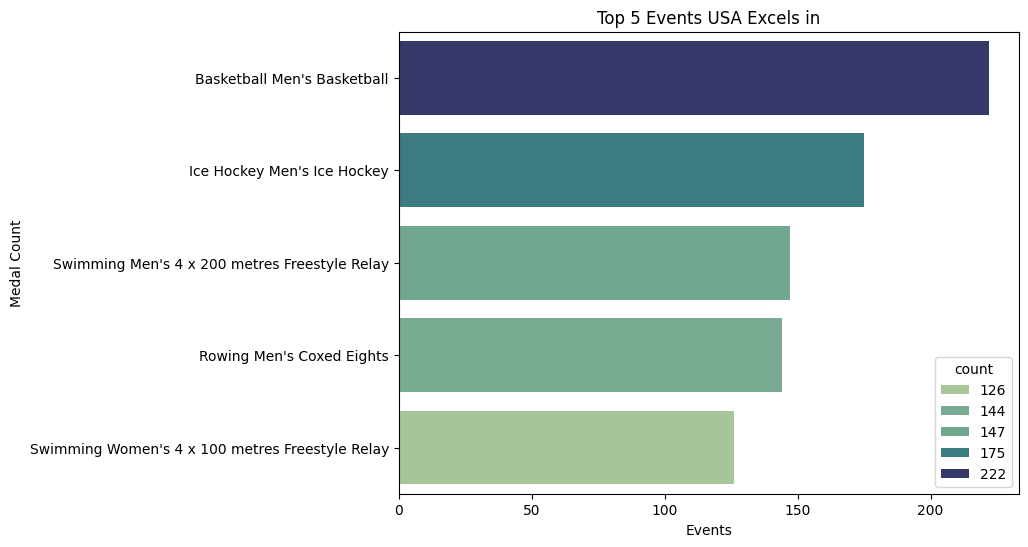

In [ ]:
# # Let's see which Events the USA Excels in
top_5_usa_events = medalists_usa['Event'].value_counts().reset_index().head()

plt.figure(figsize=(8,6))
sns.barplot(data=top_5_usa_events, y='Event', x='count', hue='count', palette=sns.color_palette("crest", as_cmap=True))
plt.title("Top 5 Events USA Excels in")
plt.xlabel("Events")
plt.ylabel("Medal Count")
plt.show()

#### Countries Hosting Olympics
- Let's check if hosting the olympics improve the performance of that nation's athletes

- The USA Has won the most number of medals in the years 1904 and 1984, These were also the 2 out of 4 times  (1904, 1932, 1984, 1996) when USA hosted the summer olympics

- Let's check out the other top nations in olympics (Russia and Germany) to see if their performance improved when they hosted the olympics

- Russia also won the most number of medals at the summer olympics when Russia or the Soviet Union, at the time of 1980 hosted the Summer olympics. But this was a controversial summer olympics as The United States and many other countries boycotted these Games in protest of the Soviet invasion of Afghanistan

- Germany hosted the Summer Olympics in 1936 and 1972, achieving notable success in both editions. In 1936, Germany won more medals than in the preceding and subsequent editions until 1968. In 1972, Germany surpassed its medal tally from 1936, marking a significant achievement and continuing its strong performance in the following years

- Hosting the Olympics often boosts the host country's performance, likely due to the home-ground advantage and the added motivation for athletes to excel and win medals for their nation, driven by a sense of patriotism.

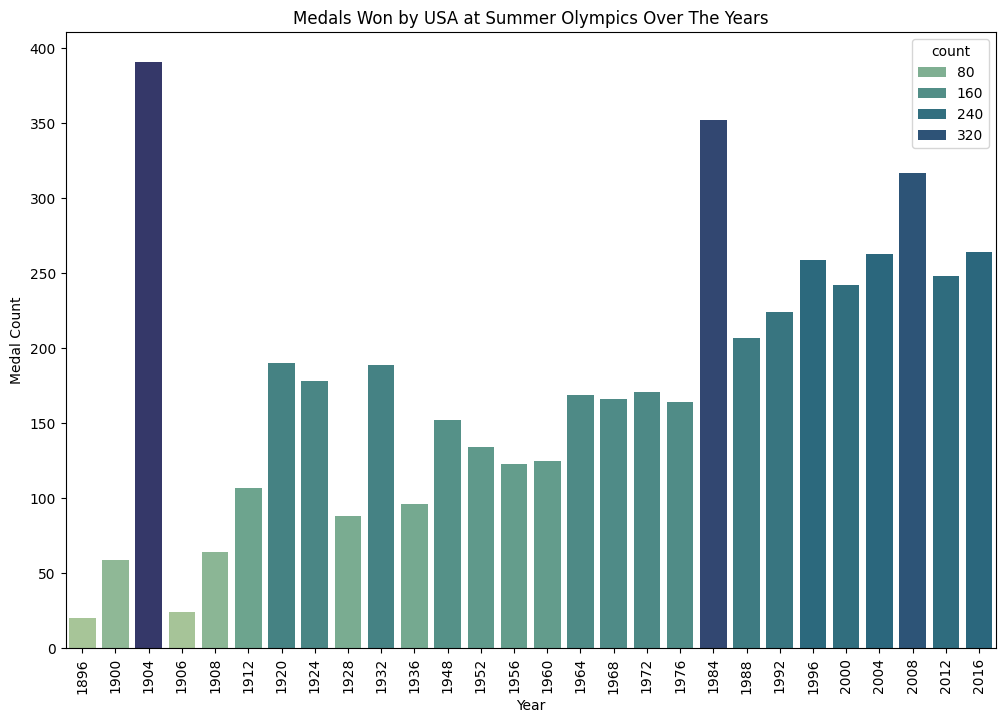

In [ ]:
# Let's use a barplot to see the number of medals won by USA each summer olympics
usa_summer = medalists_usa[medalists_usa['Season']=='Summer']
usa_summer_medals_per_year = usa_summer['Year'].value_counts().reset_index().sort_values(by="Year")

plt.figure(figsize=(12, 8))
sns.barplot(data=usa_summer_medals_per_year, y='count', x='Year', hue='count', palette=sns.color_palette("crest", as_cmap=True))
plt.title("Medals Won by USA at Summer Olympics Over The Years")
plt.xlabel("Year")
plt.ylabel("Medal Count")
plt.xticks(rotation=90)
plt.show()

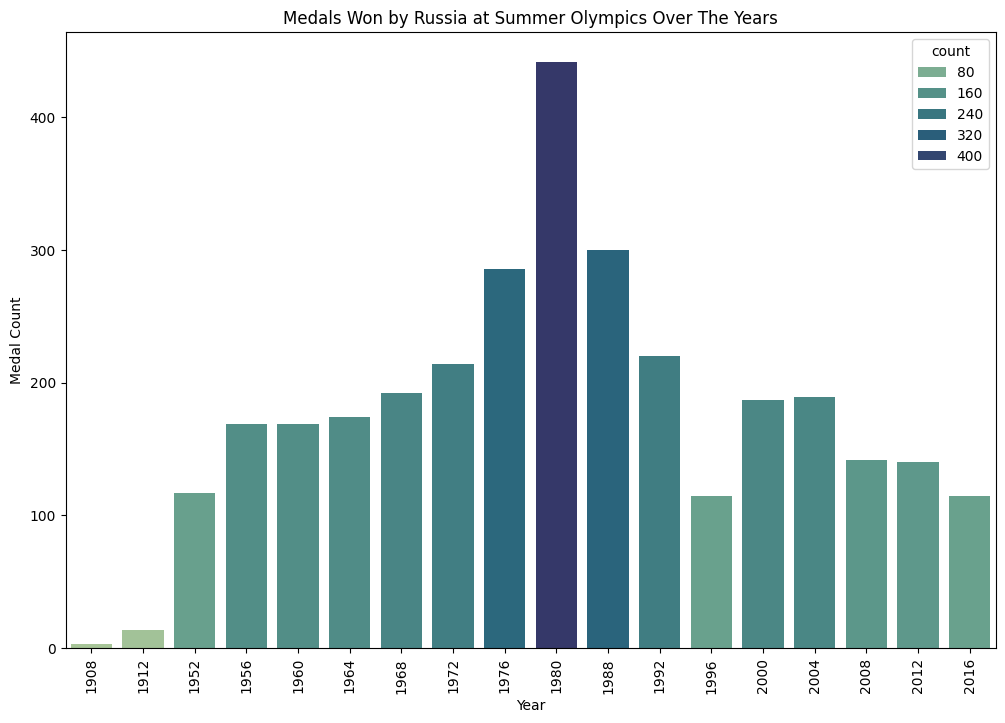

In [ ]:
russia_summer = medalists[(medalists['Season']=='Summer') & (medalists['Country']=='Russia')]
russia_summer_medals_per_year = russia_summer['Year'].value_counts().reset_index().sort_values(by="Year")

plt.figure(figsize=(12, 8))
sns.barplot(data=russia_summer_medals_per_year, y='count', x='Year', hue='count', palette=sns.color_palette("crest", as_cmap=True))
plt.title("Medals Won by Russia at Summer Olympics Over The Years")
plt.xlabel("Year")
plt.ylabel("Medal Count")
plt.xticks(rotation=90)
plt.show()

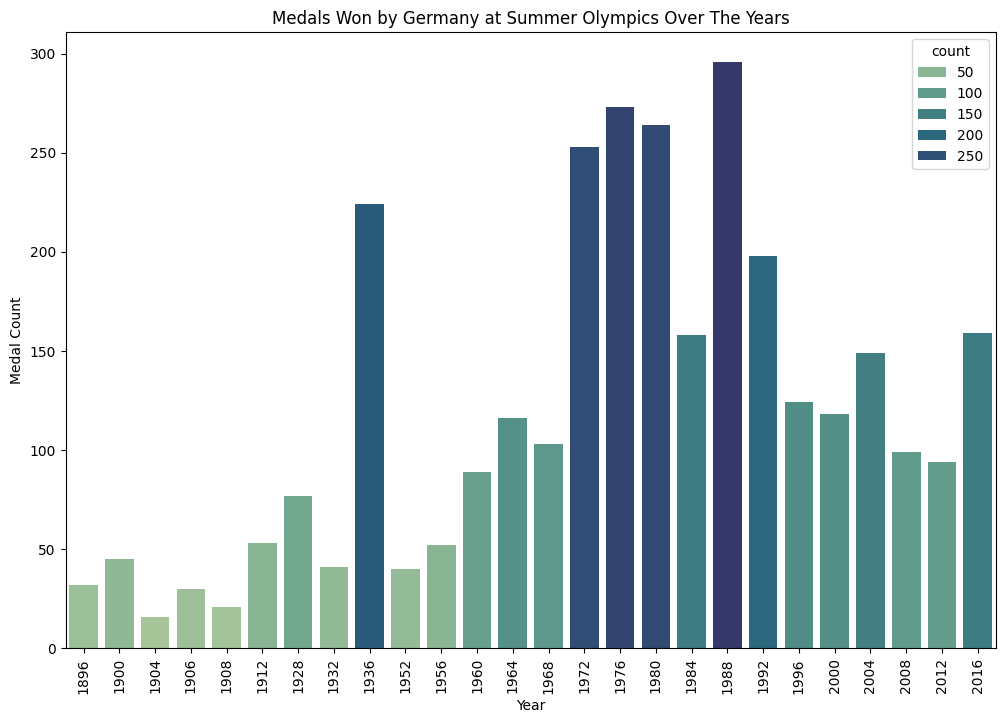

In [ ]:
germany_summer = medalists[(medalists['Season']=='Summer') & (medalists['Country']=='Germany')]
germany_summer_medals_per_year = germany_summer['Year'].value_counts().reset_index().sort_values(by="Year")

plt.figure(figsize=(12, 8))
sns.barplot(data=germany_summer_medals_per_year, y='count', x='Year', hue='count', palette=sns.color_palette("crest", as_cmap=True))
plt.title("Medals Won by Germany at Summer Olympics Over The Years")
plt.xlabel("Year")
plt.ylabel("Medal Count")
plt.xticks(rotation=90)
plt.show()

### Informative Notes

- The Summer and Winter Olympics used to occur in four-year intervals. This tradition dates back to Ancient Greece when the first Olympics were held in 776 BC.

- But the Summer and Winter Olympics are now staggered so that there's an Olympic event every two years: the Summer Olympics are held every leap year, and the Winter Olympics are held two years after the leap year.

- The schedule was changed in 1986 when the International Olympic Committee (IOC) voted to allow one competition to be held every two years. According to Jason Stallman, an Olympic editor at *The New York Times*, this decision gave the Winter Olympics more prominence, improved media coverage for both games, and significantly increased revenue for the IOC, largely through television rights.

- The sport of Aeronautics, more accurately described as gliding, has been on the Olympic program only once, as a demonstration sport at the Berlin 1936 Olympic Games. No competition was held, just a demonstration of the sport by 14 pilots from seven countries on August 4th 1936.

- Jeu de paume was an event contested at the 1908 Summer Olympics, the only time the Summer Olympic Games featured the sport as a medal event.
In the Official Report of the 1908 Olympic Games, the sport is referred to as "Tennis (jeu de paume)", while tennis is referred to as "lawn tennis". The competition venue was the Queen's Club in West Kensington, London.

- The 1932 Summer Olympics, held in Los Angeles, saw a significant decrease in participation compared to previous games. There were several reasons for this:
  - The Great Depression: The global economic crisis known as the Great Depression began in 1929 and had a profound impact on the world. Many countries could not afford to send their athletes to the Olympics due to financial constraints.
  - Geographical Location: The games were held in Los Angeles, which was a long and expensive journey for many countries, especially those in Europe. This was a deterrent for many nations.
  - Political Tensions: The early 1930s were a time of rising political tensions, with the rise of fascism in Europe and the Japanese invasion of Manchuria. These tensions may have discouraged some countries from participating.

- The 1956 Olympics in Melbourne were affected by a number of boycotts. Egypt, Iraq and Lebanon announced they would not participate in the Games in response to the Suez Crisis when Egypt was invaded by Israel, Britain and France after Egypt nationalised the Suez canal. Meanwhile, the Soviet Union crushed the Hungarian Revolution, leading to the withdrawal of the Netherlands, Spain, and Switzerland. Less than two weeks before the Opening Ceremony November, the People's Republic of China chose to boycott the event because Taiwan, officially the Republic of China had been allowed to compete.China did not compete in the Olympics again until Los Angeles 1984.

- 1976 Summer Olympics - https://www.rfi.fr/en/sports/20231121-montreal-olympic-1976-the-year-of-the-african-boycott

- 1980 Summer Olympics - https://en.wikipedia.org/wiki/1980_Summer_Olympics_boycott